# SVM

1) Prepare a classification model using SVM for salary data 

Data Description:

age -- age of a person
workclass	-- A work class is a grouping of work 
education	-- Education of an individuals	
maritalstatus -- Marital status of an individulas	
occupation	 -- occupation of an individuals
relationship -- 	
race --  Race of an Individual
sex --  Gender of an Individual
capitalgain --  profit received from the sale of an investment	
capitalloss	-- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week	
native -- Native of an individual
Salary -- salary of an individual


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.naive_bayes import GaussianNB, MultinomialNB
# from sklearn.metrics import classification_report,confusion_matrix
# from sklearn.preprocessing import LabelEncoder

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data_train = pd.read_csv(r"SalaryData_Train.csv")
print("data_train Shape:",data_train.shape)
data_test = pd.read_csv(r"SalaryData_Test.csv")
print("data_test Shape:",data_test.shape)
data_Full = pd.concat([data_train, data_test], ignore_index=True)
data_Full.tail()

data_train Shape: (30161, 14)
data_test Shape: (15060, 14)


age      workclass   education  educationno        maritalstatus  \
45216   33        Private   Bachelors           13        Never-married   
45217   39        Private   Bachelors           13             Divorced   
45218   38        Private   Bachelors           13   Married-civ-spouse   
45219   44        Private   Bachelors           13             Divorced   
45220   35   Self-emp-inc   Bachelors           13   Married-civ-spouse   

             occupation    relationship                 race      sex  \
45216    Prof-specialty       Own-child                White     Male   
45217    Prof-specialty   Not-in-family                White   Female   
45218    Prof-specialty         Husband                White     Male   
45219      Adm-clerical       Own-child   Asian-Pac-Islander     Male   
45220   Exec-managerial         Husband                White     Male   

       capitalgain  capitalloss  hoursperweek          native  Salary  
45216            0            0            40   United-States   <=50K  
45217            0            0            36   United-States   <=50K  
45218            0            0            50   United-States   <=50K  
45219         5455            0            40   United-States   <=50K  
45220            0            0            60   United-States    >50K

### EDA and Data Visualization

Train Data

In [4]:
print('\n Describe:');   print(data_train.describe())
print('\n Info:');   print(data_train.info())
print('\n Null values:');   print(data_train.isnull().sum())
# print('\n Duplicated:');   print(data_train[data_train.duplicated()])
print('\n Duplicated:');   print('\nNumber of unique duplicates:', len(data_train[data_train.duplicated()]));   print(data_train[data_train.duplicated()].value_counts())
data_train=data_train.drop_duplicates();  print("data Shape:",data_train.shape)


 Describe:
                age   educationno   capitalgain   capitalloss  hoursperweek
count  30161.000000  30161.000000  30161.000000  30161.000000  30161.000000
mean      38.438115     10.121316   1092.044064     88.302311     40.931269
std       13.134830      2.550037   7406.466611    404.121321     11.980182
min       17.000000      1.000000      0.000000      0.000000      1.000000
25%       28.000000      9.000000      0.000000      0.000000     40.000000
50%       37.000000     10.000000      0.000000      0.000000     40.000000
75%       47.000000     13.000000      0.000000      0.000000     45.000000
max       90.000000     16.000000  99999.000000   4356.000000     99.000000

 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education 

Test Data

In [5]:
print('\n Describe:');   print(data_test.describe())
print('\n Info:');   print(data_test.info())
print('\n Null values:');   print(data_test.isnull().sum())
# print('\n Duplicated:');   print(data_test[data_test.duplicated()])
print('\n Duplicated:');   print('\nNumber of unique duplicates:', len(data_test[data_test.duplicated()]));   print(data_test[data_test.duplicated()].value_counts())
data_test=data_test.drop_duplicates();  print("data Shape:",data_test.shape)


 Describe:
                age   educationno   capitalgain   capitalloss  hoursperweek
count  15060.000000  15060.000000  15060.000000  15060.000000  15060.000000
mean      38.768327     10.112749   1120.301594     89.041899     40.951594
std       13.380676      2.558727   7703.181842    406.283245     12.062831
min       17.000000      1.000000      0.000000      0.000000      1.000000
25%       28.000000      9.000000      0.000000      0.000000     40.000000
50%       37.000000     10.000000      0.000000      0.000000     40.000000
75%       48.000000     13.000000      0.000000      0.000000     45.000000
max       90.000000     16.000000  99999.000000   3770.000000     99.000000

 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education 

## Variable check

### Find columns with the same values

In [6]:
data=data_train.copy()

In [7]:
# Find columns with the same values
columns_with_same_values = data.columns[data.nunique() == 1].tolist()

for column in columns_with_same_values:
    unique_values = data[column].unique()
    print(f"Unique values in the '{column}' column:")
    print(unique_values)
    print()

# excluding columns_with_same_values
data = data.drop(columns=columns_with_same_values)
print("excluded columns_with_same_values, nos:",columns_with_same_values ,",Final shape:", data.shape)

excluded columns_with_same_values, nos: [] ,Final shape: (26903, 14)


In [8]:
# Discrete Variables Count
discrete_feature=[feature for feature in data.columns if len(data[feature].unique())<20 and feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))
print(discrete_feature)

# Continuous Feature Count
continuous_feature=[feature for feature in data.columns if data[feature].dtype!='O' and feature not in discrete_feature]
print('\nContinuous Feature Count {}'.format(len(continuous_feature)))
print(continuous_feature)

# Other Features Count
other_feature = [feature for feature in data.columns if feature not in discrete_feature and feature not in continuous_feature]
print('\nOther Features Count: {}'.format(len(other_feature)))
print('Other Features: {}'.format(other_feature))

# Numeric Data
numeric_data = data.select_dtypes(include='number')
print('\nNumeric Data Shape:', numeric_data.shape)
print(numeric_data.columns)

# Categorical Data
categorical_data = data.select_dtypes(include='object')
print('\nCategorical Data Shape:', categorical_data.shape)
print('Categorical Columns:', categorical_data.columns)

Discrete Variables Count: 9
['workclass', 'education', 'educationno', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'Salary']

Continuous Feature Count 4
['age', 'capitalgain', 'capitalloss', 'hoursperweek']

Other Features Count: 1
Other Features: ['native']

Numeric Data Shape: (26903, 5)
Index(['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek'], dtype='object')

Categorical Data Shape: (26903, 9)
Categorical Columns: Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native', 'Salary'],
      dtype='object')


## Categorical Data

Bar plot for all categorical

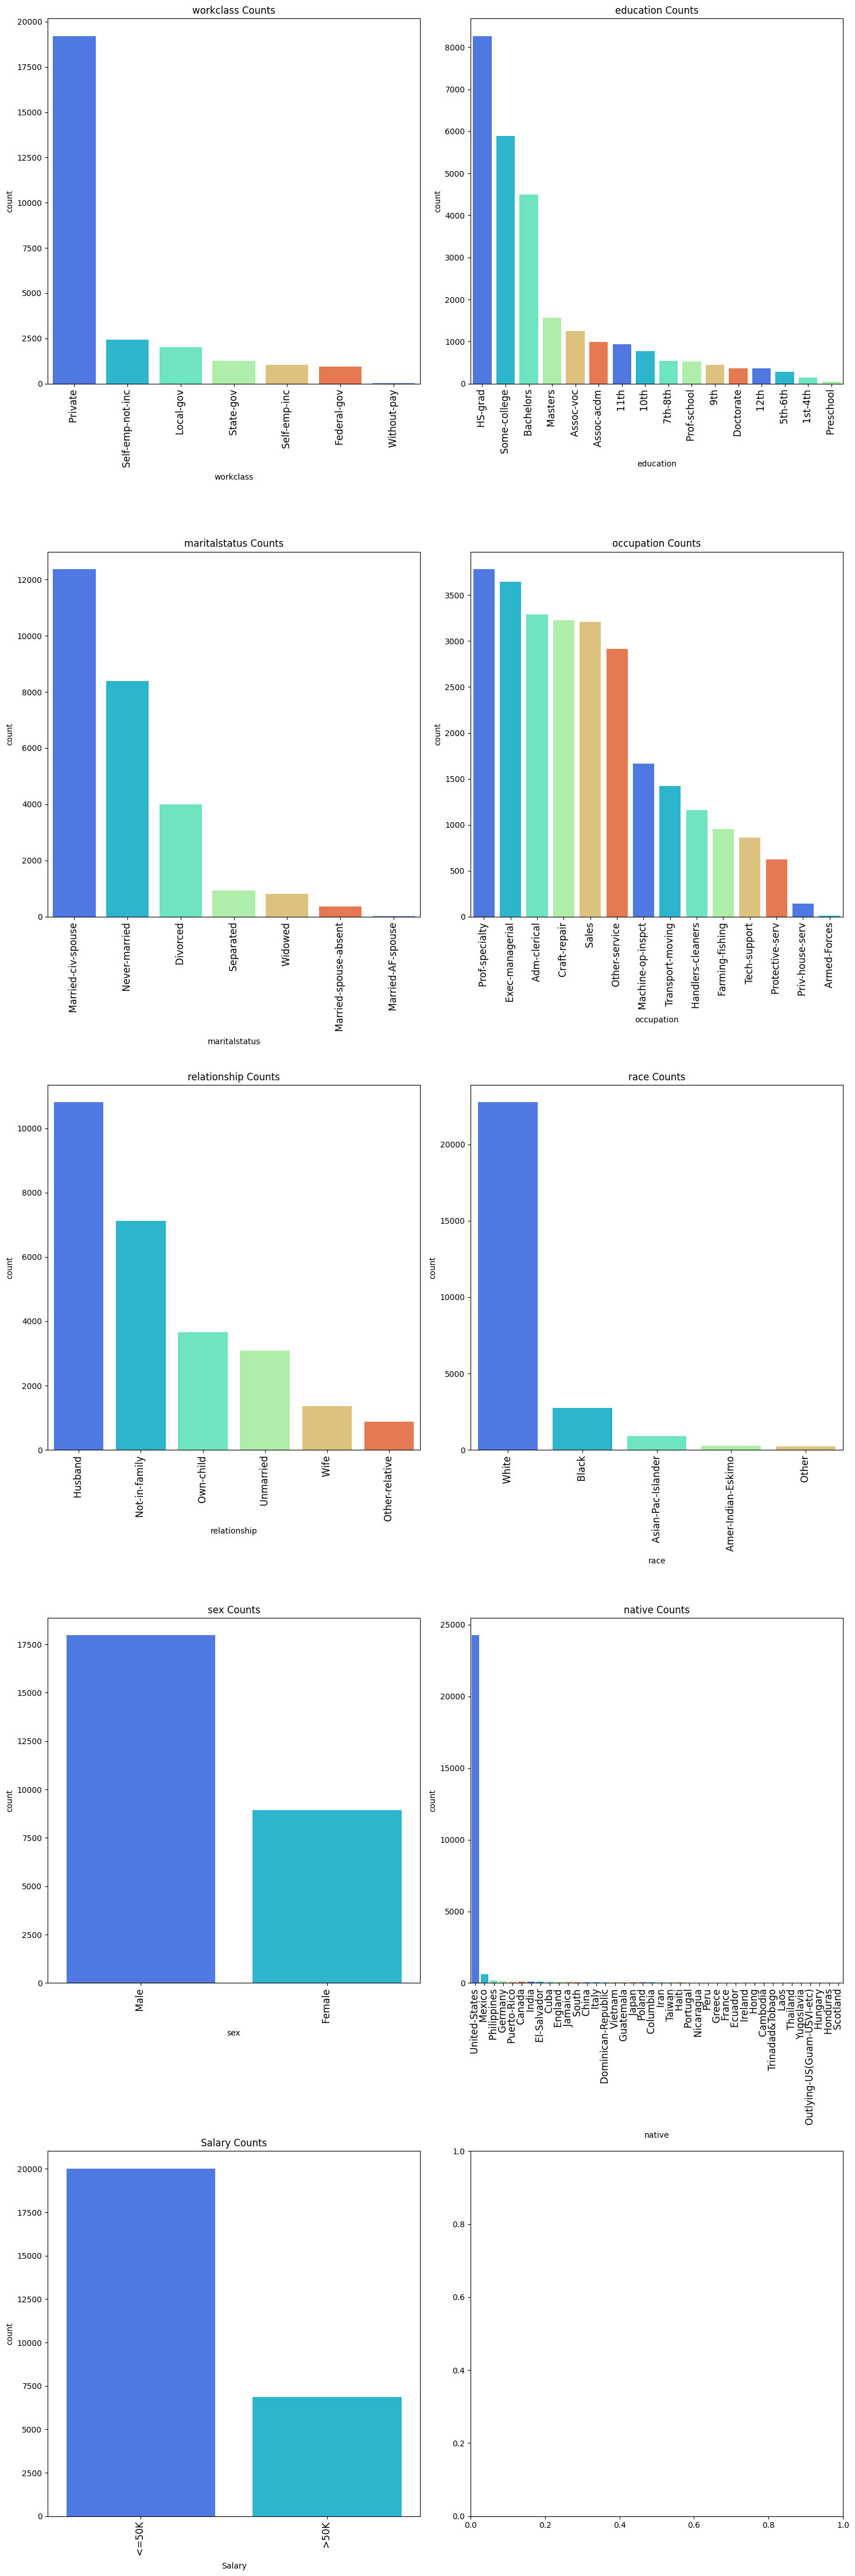

In [9]:
num_columns = len(categorical_data.columns)
num_rows = num_columns // 2 + num_columns % 2  # Ensure odd number of columns works correctly
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, num_rows * 9))

pal = sns.color_palette('rainbow')
for i, column in enumerate(categorical_data.columns):
    row_index = i // 2
    col_index = i % 2
    
    sns.countplot(x=column, data=categorical_data, palette=pal,
                  order=categorical_data[column].value_counts().index,
                  ax=axes[row_index, col_index])
    
    axes[row_index, col_index].set_xticklabels(axes[row_index, col_index].get_xticklabels(), rotation=90, fontsize=12)
    axes[row_index, col_index].set_title(f'{column} Counts')

# Adjust layout
plt.tight_layout()
plt.show()


### Labelencoder to convert categorical data into numeric

## For Data
here Train data

In [10]:
cat_data = categorical_data.copy()
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in categorical_data.columns:
    cat_data[column] = label_encoder.fit_transform(cat_data[column])
    
    print(f"\nLabel Encoding for {column}:")
    # print("\n", cat_data[column].value_counts())
    unique_values = categorical_data[column].unique()

    for value in unique_values:
        label = label_encoder.transform([value])[0]
        counts = cat_data[column].value_counts()[label]
        print(f"Value: {value} -> Label: {label} --> Counts: {counts}")
    


Label Encoding for workclass:
Value:  State-gov -> Label: 5 --> Counts: 1253
Value:  Self-emp-not-inc -> Label: 4 --> Counts: 2431
Value:  Private -> Label: 2 --> Counts: 19213
Value:  Federal-gov -> Label: 0 --> Counts: 929
Value:  Local-gov -> Label: 1 --> Counts: 2014
Value:  Self-emp-inc -> Label: 3 --> Counts: 1049
Value:  Without-pay -> Label: 6 --> Counts: 14

Label Encoding for education:
Value:  Bachelors -> Label: 9 --> Counts: 4503
Value:  HS-grad -> Label: 11 --> Counts: 8268
Value:  11th -> Label: 1 --> Counts: 941
Value:  Masters -> Label: 12 --> Counts: 1558
Value:  9th -> Label: 6 --> Counts: 449
Value:  Some-college -> Label: 15 --> Counts: 5893
Value:  Assoc-acdm -> Label: 7 --> Counts: 994
Value:  7th-8th -> Label: 5 --> Counts: 541
Value:  Doctorate -> Label: 10 --> Counts: 364
Value:  Assoc-voc -> Label: 8 --> Counts: 1256
Value:  Prof-school -> Label: 14 --> Counts: 532
Value:  5th-6th -> Label: 4 --> Counts: 283
Value:  10th -> Label: 0 --> Counts: 770
Value:  P

## for Test Data

In [11]:
Test_categorical_data = data_test.select_dtypes(include='object')
Test_numeric_data = data_test.select_dtypes(include='number')
cat_data_Test = Test_categorical_data.copy()

for column in Test_categorical_data.columns:
    cat_data_Test[column] = label_encoder.fit_transform(cat_data_Test[column])
    print(f"\nLabel Encoding for {column}:")
    # print("\n", cat_data_Test[column].value_counts())
    unique_values = Test_categorical_data[column].unique()

    for value in unique_values:
        label = label_encoder.transform([value])[0]
        counts = cat_data_Test[column].value_counts()[label]
        print(f"Value: {value} -> Label: {label} --> Counts: {counts}")
                    
data_test_Final = pd.concat([Test_numeric_data,cat_data_Test], axis=1)
data_test_Final


Label Encoding for workclass:
Value:  Private -> Label: 2 --> Counts: 10138
Value:  Local-gov -> Label: 1 --> Counts: 1017
Value:  Self-emp-not-inc -> Label: 4 --> Counts: 1279
Value:  Federal-gov -> Label: 0 --> Counts: 460
Value:  State-gov -> Label: 5 --> Counts: 664
Value:  Self-emp-inc -> Label: 3 --> Counts: 565
Value:  Without-pay -> Label: 6 --> Counts: 7

Label Encoding for education:
Value:  11th -> Label: 1 --> Counts: 542
Value:  HS-grad -> Label: 11 --> Counts: 4473
Value:  Assoc-acdm -> Label: 7 --> Counts: 493
Value:  Some-college -> Label: 15 --> Counts: 3014
Value:  10th -> Label: 0 --> Counts: 395
Value:  Prof-school -> Label: 14 --> Counts: 241
Value:  7th-8th -> Label: 5 --> Counts: 265
Value:  Bachelors -> Label: 9 --> Counts: 2369
Value:  Masters -> Label: 12 --> Counts: 864
Value:  5th-6th -> Label: 4 --> Counts: 161
Value:  Assoc-voc -> Label: 8 --> Counts: 634
Value:  9th -> Label: 6 --> Counts: 219
Value:  Doctorate -> Label: 10 --> Counts: 168
Value:  12th -

age  educationno  capitalgain  capitalloss  hoursperweek  workclass  \
0       25            7            0            0            40          2   
1       38            9            0            0            50          2   
2       28           12            0            0            40          1   
3       44           10         7688            0            40          2   
4       34            6            0            0            30          2   
...    ...          ...          ...          ...           ...        ...   
15055   33           13            0            0            40          2   
15056   39           13            0            0            36          2   
15057   38           13            0            0            50          2   
15058   44           13         5455            0            40          2   
15059   35           13            0            0            60          3   

       education  maritalstatus  occupation  relationship  race  sex  native  \
0              1              4           6             3     2    1      37   
1             11              2           4             0     4    1      37   
2              7              2          10             0     4    1      37   
3             15              2           6             0     2    1      37   
4              0              4           7             1     4    1      37   
...          ...            ...         ...           ...   ...  ...     ...   
15055          9              4           9             3     4    1      37   
15056          9              0           9             1     4    0      37   
15057          9              2           9             0     4    1      37   
15058          9              0           0             3     1    1      37   
15059          9              2           3             0     4    1      37   

       Salary  
0           0  
1           0  
2           1  
3           1  
4           0  
...       ...  
15055       0  
15056       0  
15057       0  
15058       0  
15059       1  

[14130 rows x 14 columns]

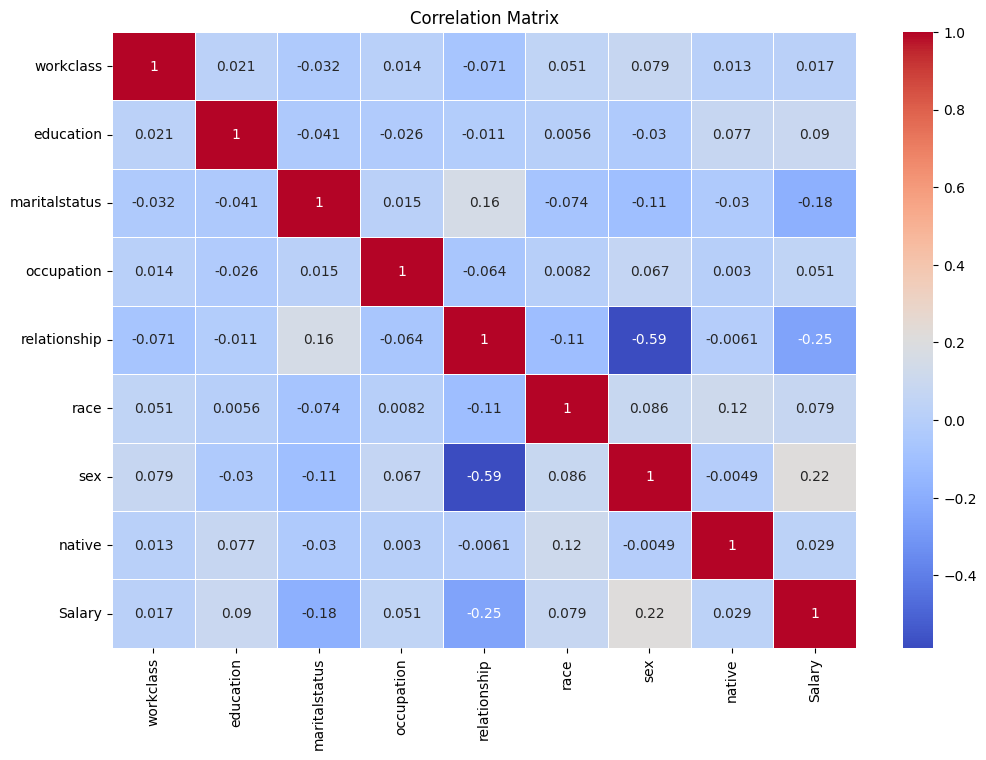

In [12]:
# Correlation Plot
corr_matrix = cat_data.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

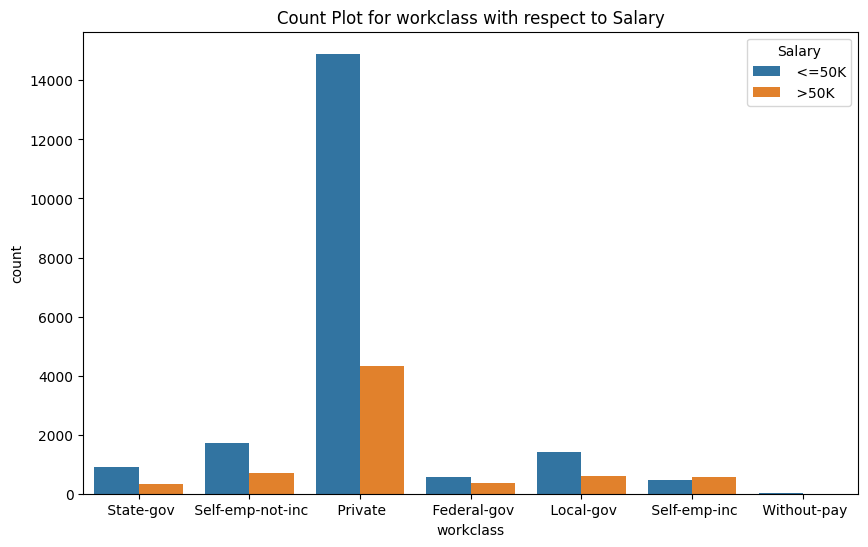

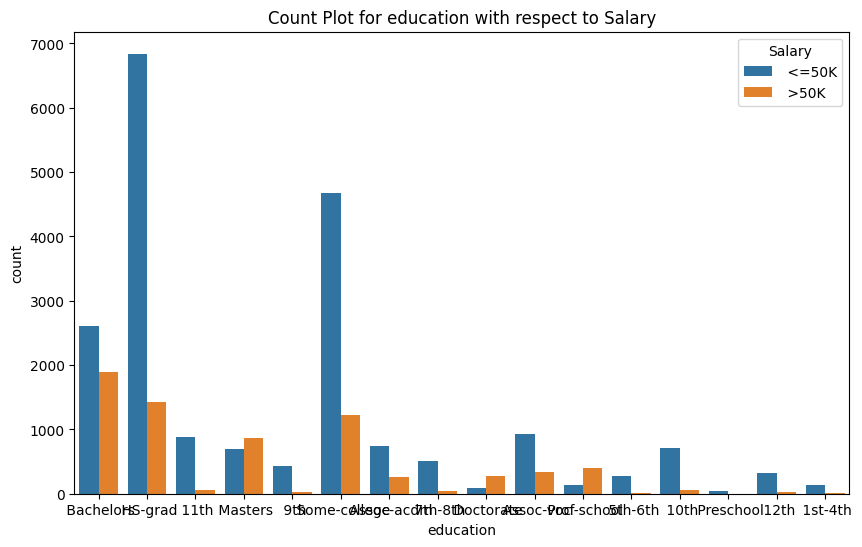

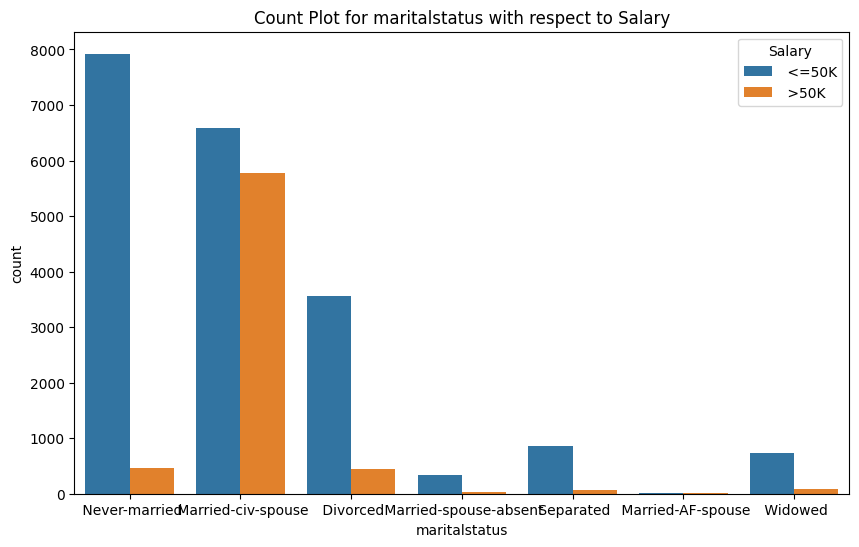

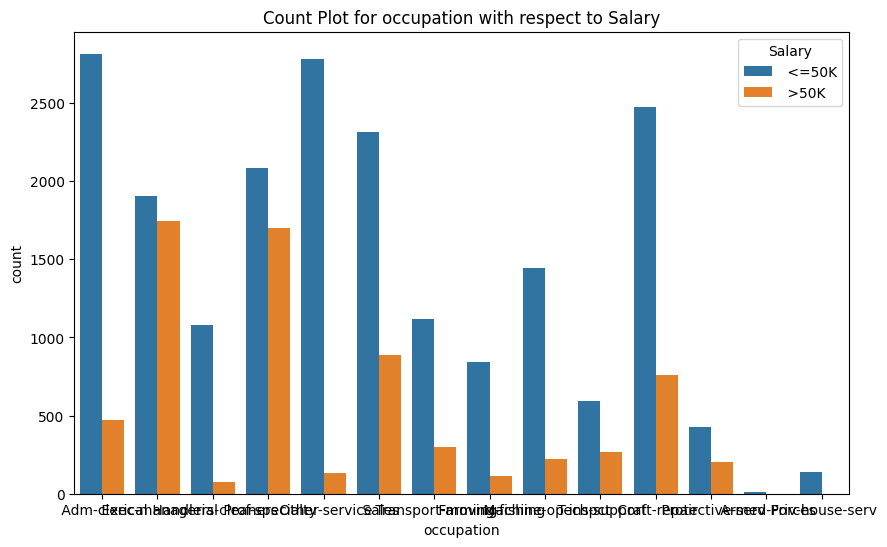

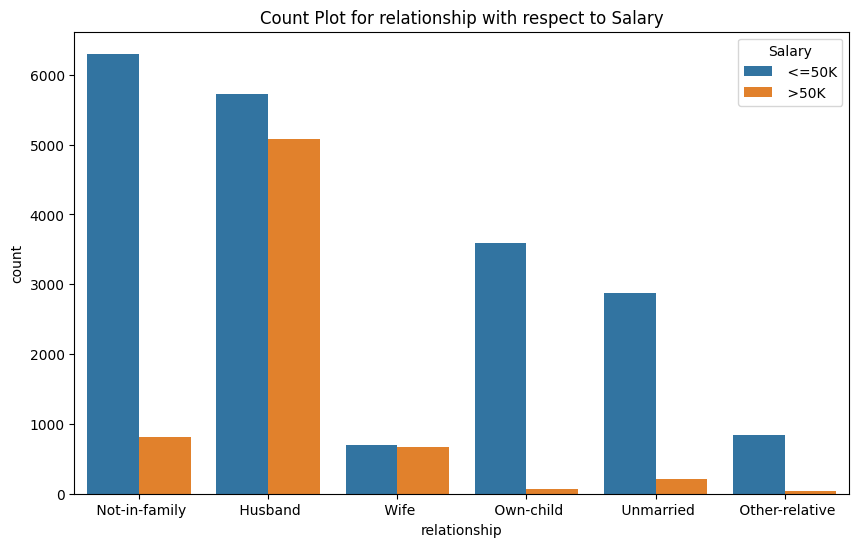

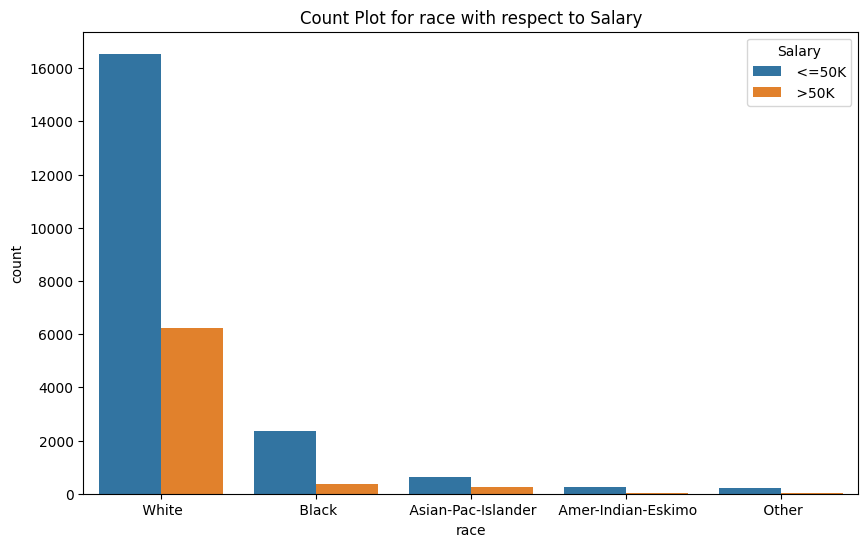

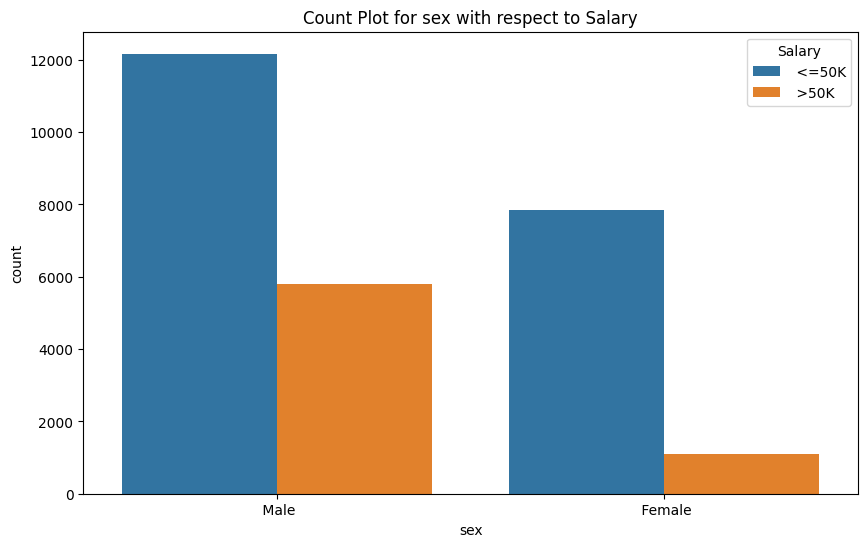

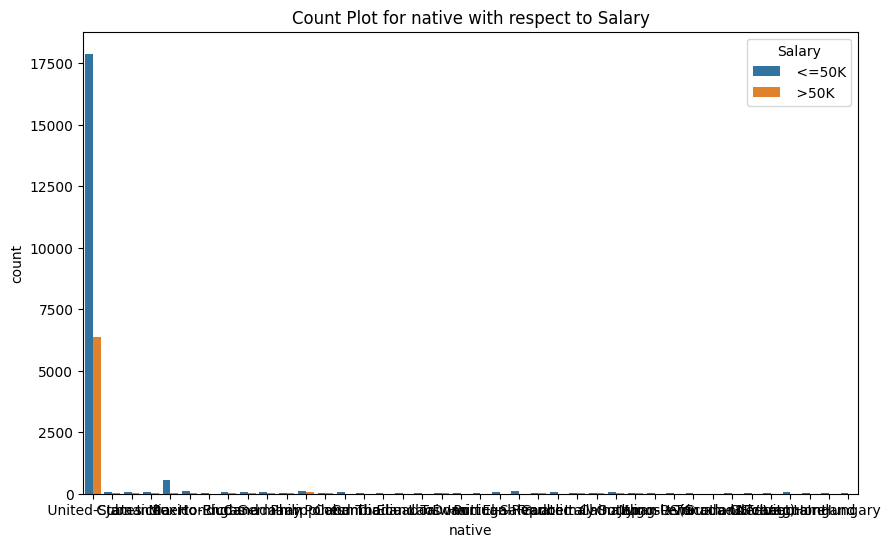

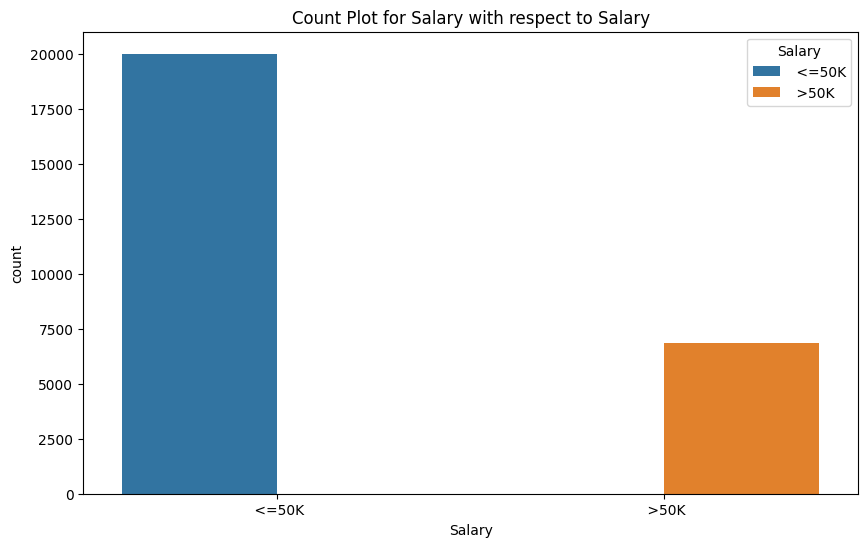

In [13]:
categorical_columns = categorical_data.columns
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=categorical_data, x=column, hue='Salary')
    plt.title(f'Count Plot for {column} with respect to Salary')
    plt.show()

## Numeric Data

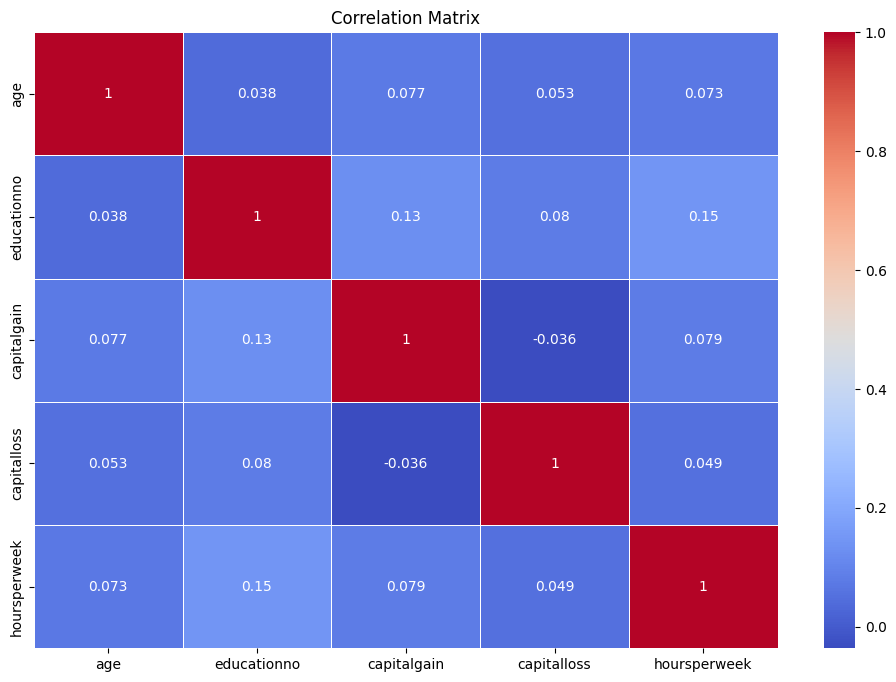

In [14]:
# Correlation Plot
corr_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

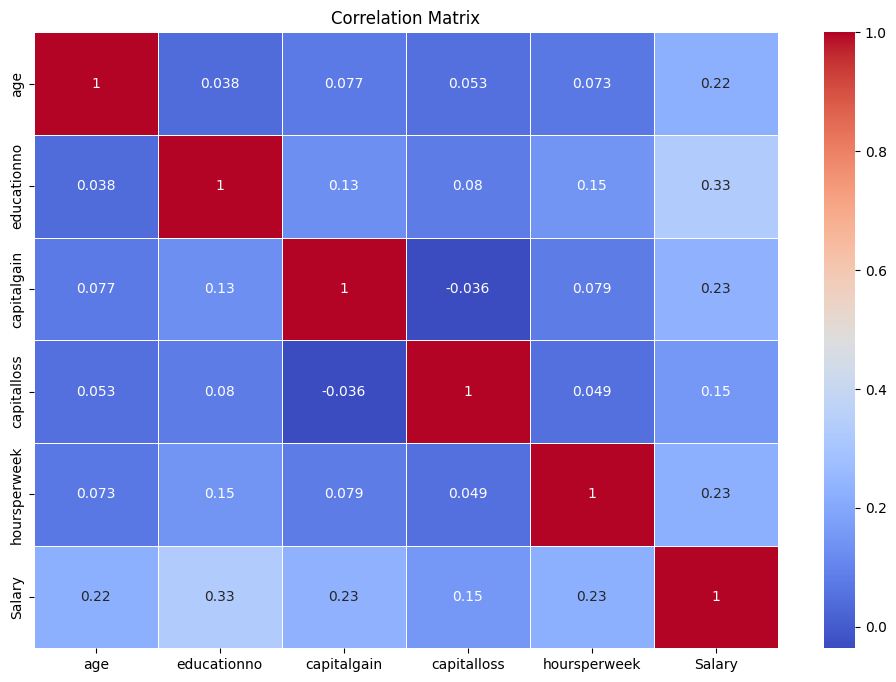

In [15]:
# Correlation Plot with dependent_variable
data_2 = pd.concat([numeric_data, cat_data['Salary']], axis=1)
corr_matrix = data_2.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### visualization

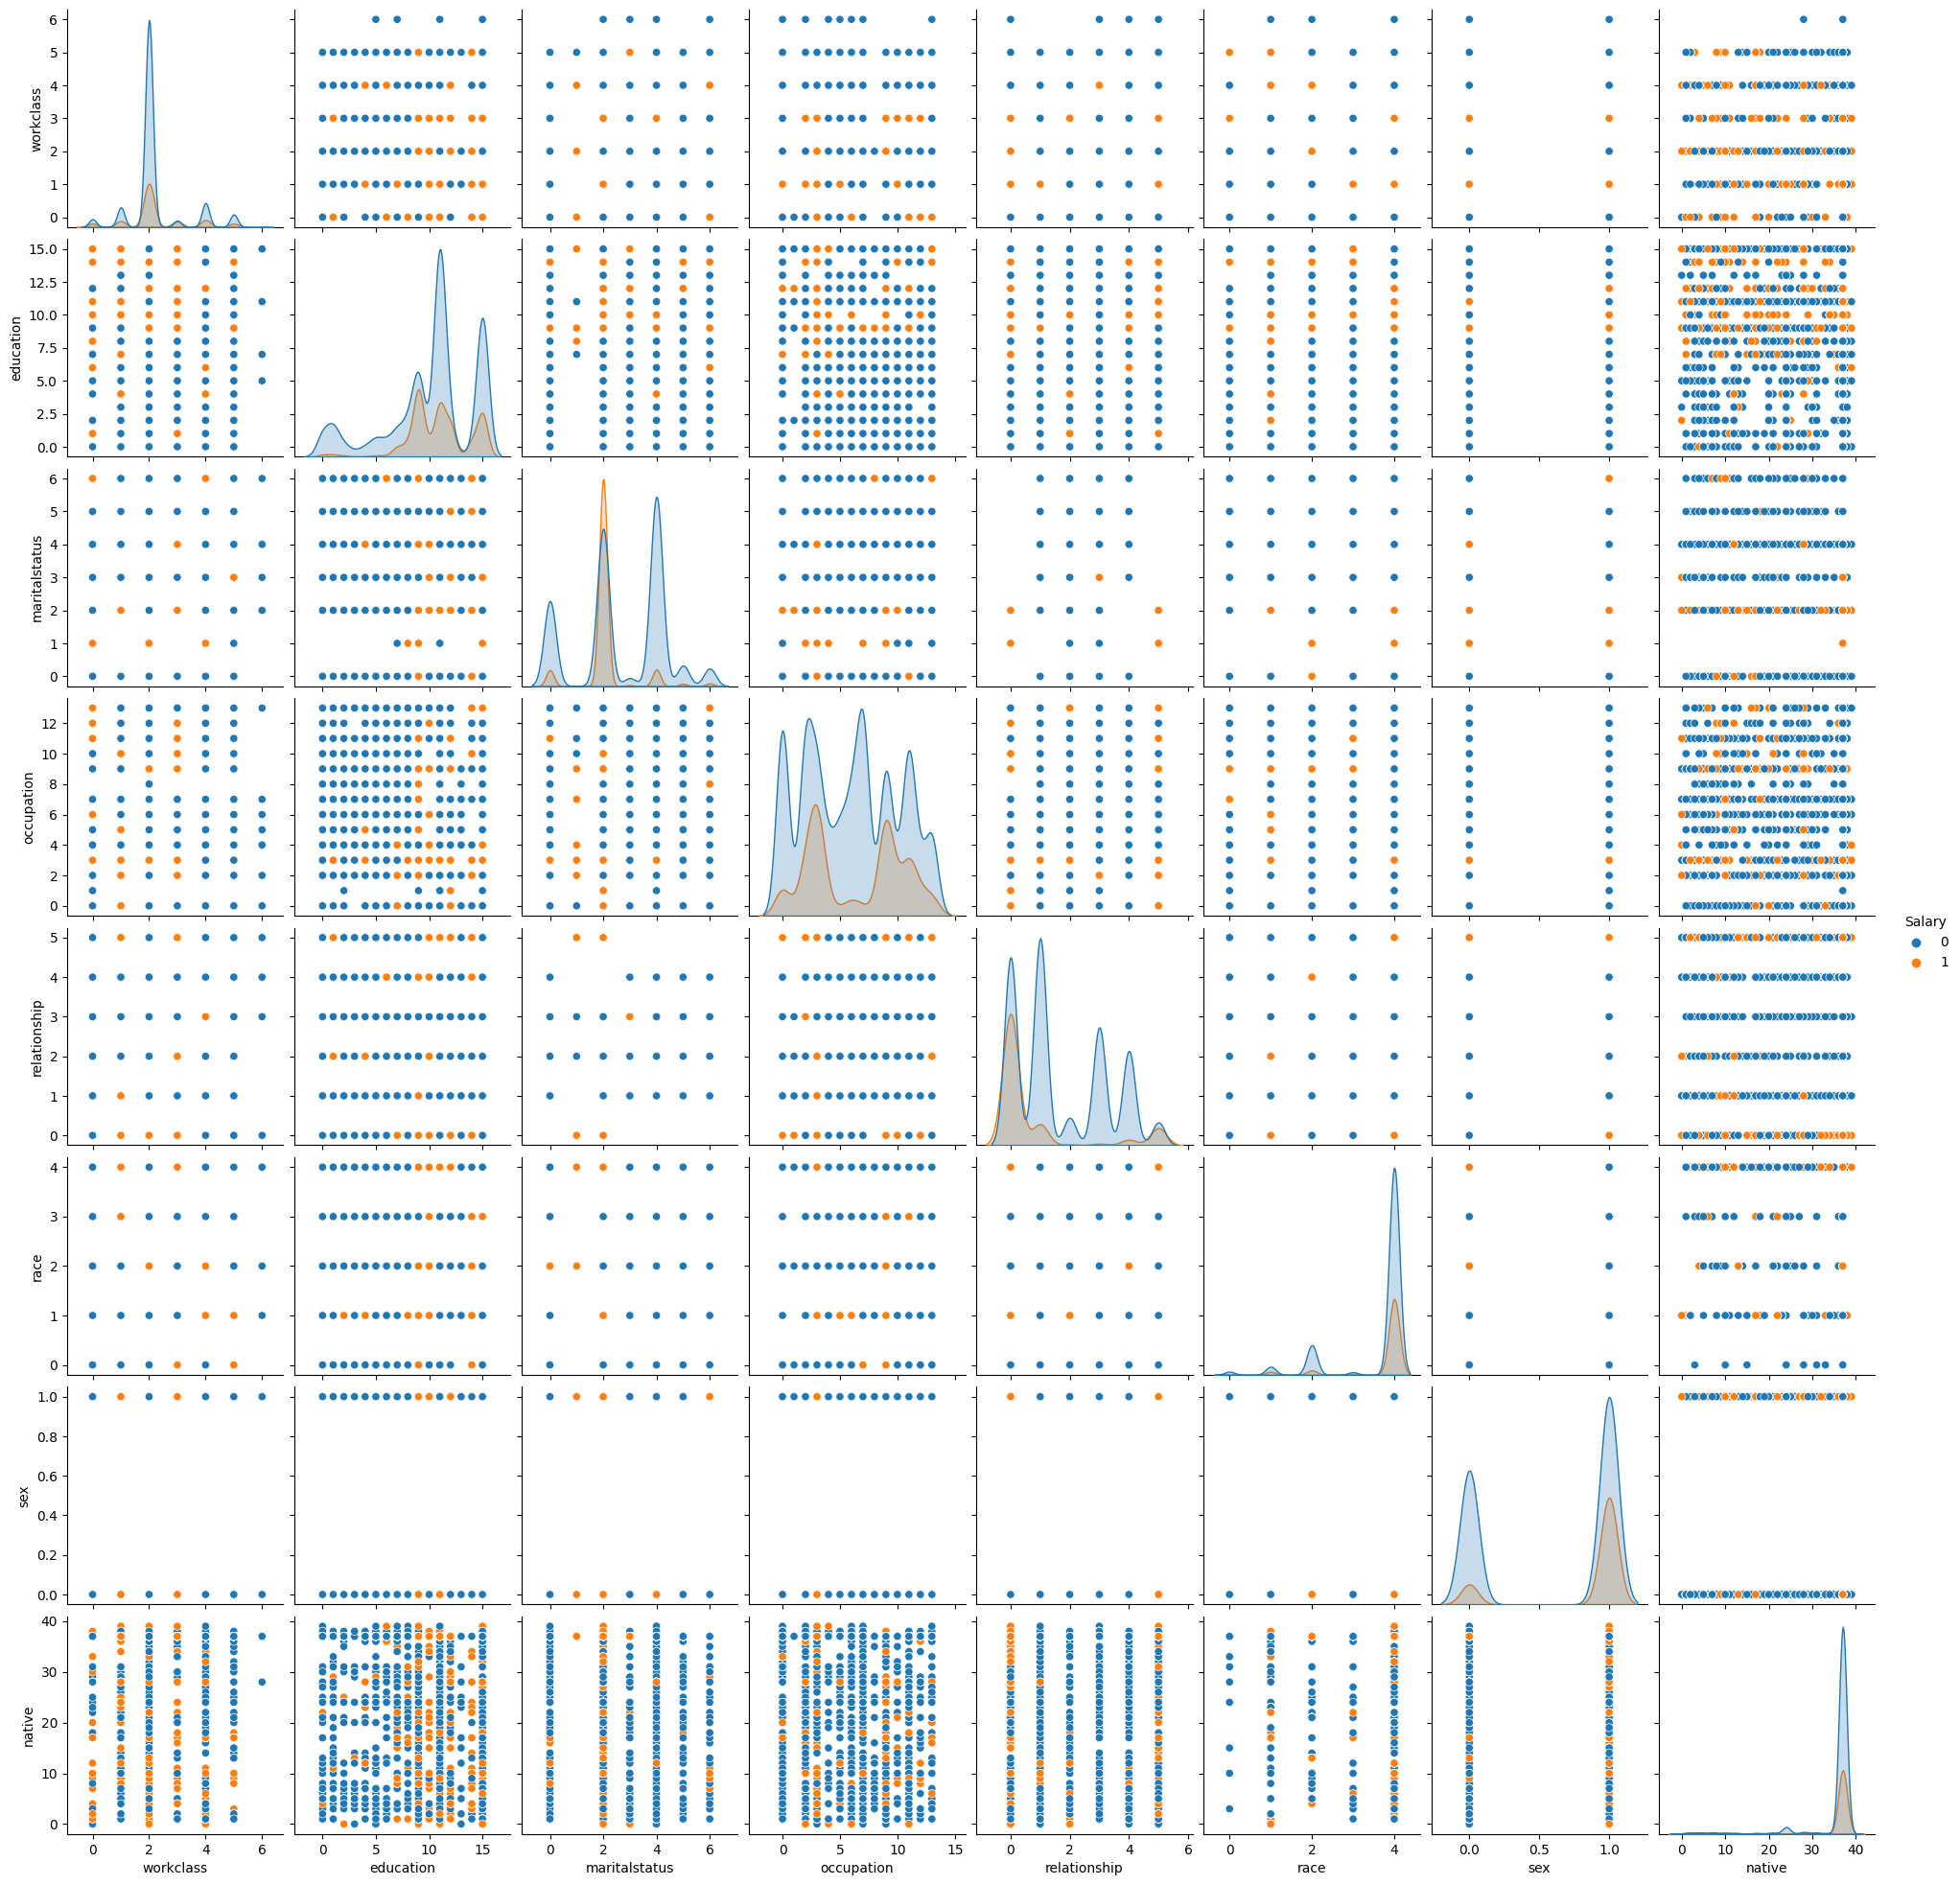

In [16]:
# relationship plot for categorical data
sns.pairplot(data= cat_data, hue = 'Salary')
plt.show()

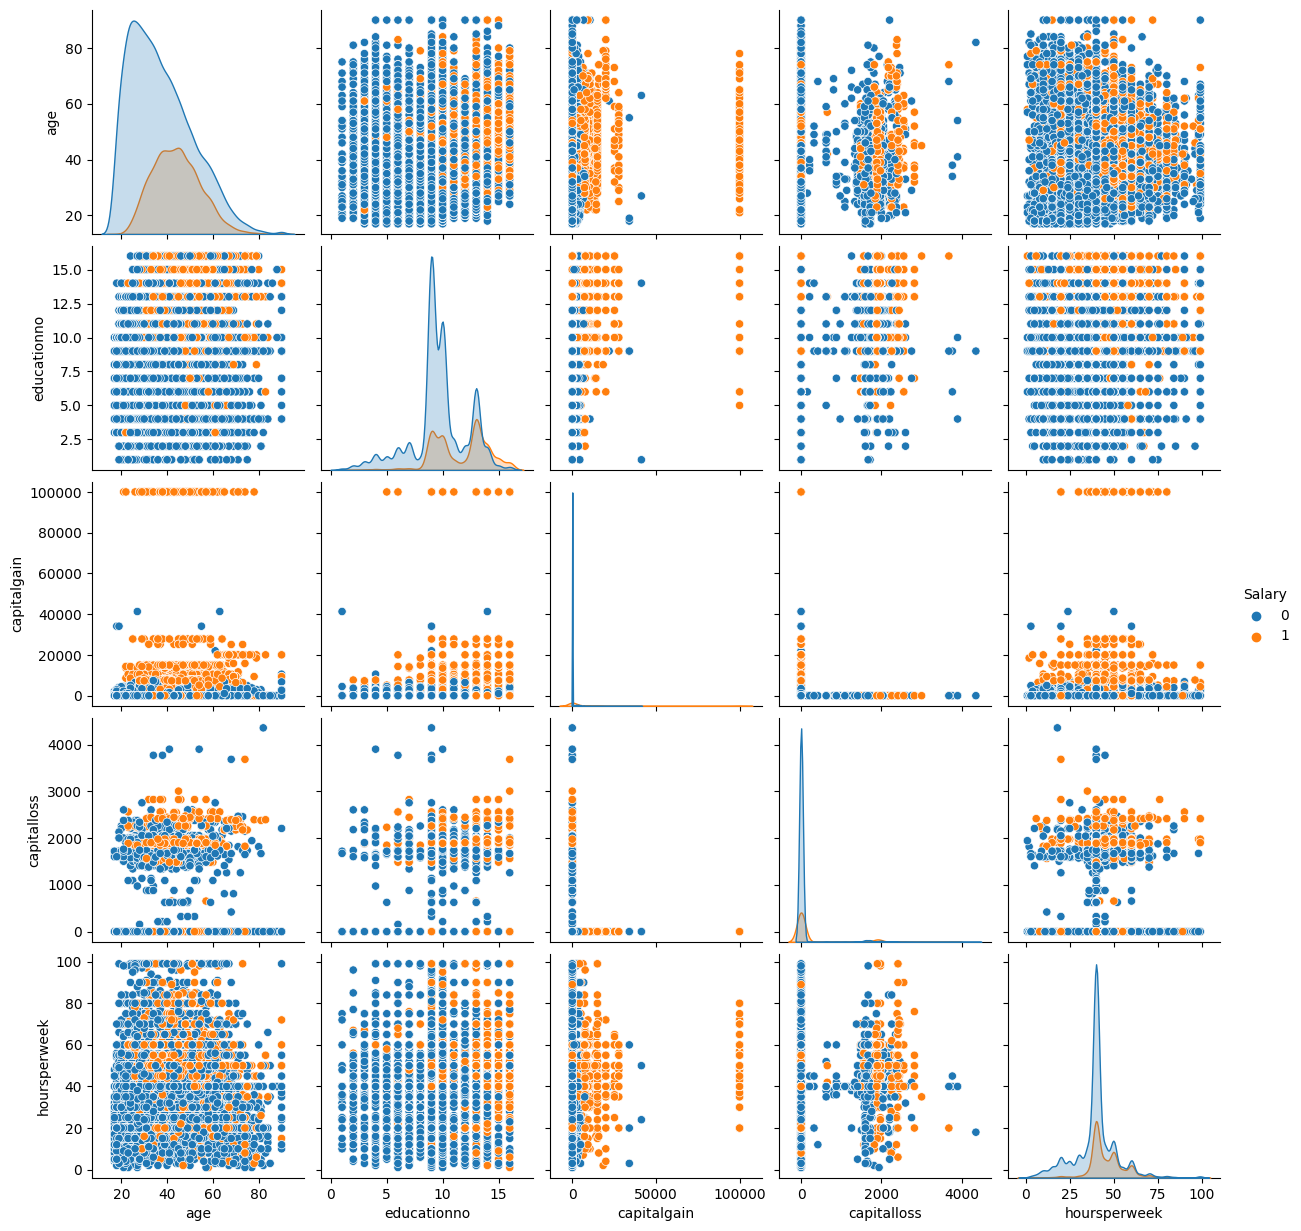

In [17]:
# relationship plot for numeric data
sns.pairplot(data= data_2, hue = 'Salary')
plt.show()

### Detect outliers and handle them

In [18]:
data_filtered=pd.concat([numeric_data,cat_data],axis=1)    #,cat_data ,numeric_data, data_2
data_filtered.shape

(26903, 14)

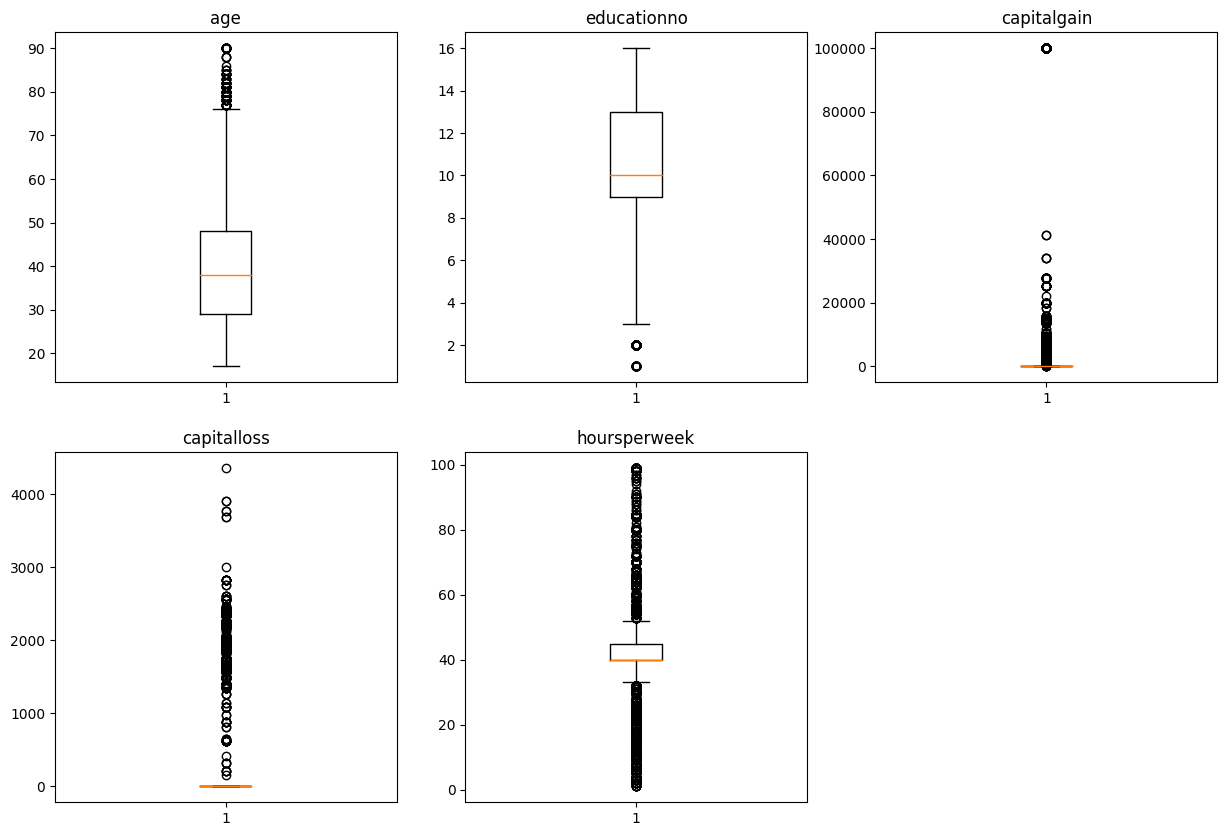

In [19]:
# display boxplots

num_columns = len(numeric_data.columns)
subplots_per_row = 3
num_rows = (num_columns + subplots_per_row - 1) // subplots_per_row

# Create subplots
fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(15, 5*num_rows))
axes = axes.flatten()

for i in range(num_columns):
    ax = axes[i]
    ax.boxplot(data_filtered.iloc[:, i])
    ax.set_title(data_filtered.columns[i])

# Hide any remaining empty subplots
for i in range(num_columns, num_rows * subplots_per_row):
    fig.delaxes(axes[i])

# plt.tight_layout()
plt.show()


#### Treating outliers with IQR

In [20]:
num_columns = len(numeric_data.columns)
new_data = data_filtered.copy()

for i in range(num_columns):
    # print("\n\nColumn Name:",(data_filtered.columns[i]))
    print("\n\nColumn Name: \033[1;34m" + "\033[1m" + data_filtered.columns[i] + "\033[0m")

    # Calculate the IQR
    Q1 = data_filtered.iloc[:, i].quantile(0.25)
    Q3 = data_filtered.iloc[:, i].quantile(0.75)
    IQR = Q3 - Q1
        
    # Identify and mark outliers using IQR
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(data_filtered[(data_filtered.iloc[:, i] > upper_bound) | (data_filtered.iloc[:, i] < lower_bound)].tail(2))
    
    # Changing the outliers
    new_data.loc[(new_data[data_filtered.columns[i]] > upper_bound), data_filtered.columns[i]] = upper_bound
    new_data.loc[(new_data[data_filtered.columns[i]] < lower_bound), data_filtered.columns[i]] = lower_bound
    
    # # Drop rows with outliers
    # outliers = new_data[(new_data.iloc[:, i] < lower_bound) | (new_data.iloc[:, i] > upper_bound)].index   
    # new_data = new_data.drop(outliers)
    
print("\nShape of new data:",new_data.shape)
# sns.boxplot(data = new_data)
# plt.show()




Column Name: age
       age  educationno  capitalgain  capitalloss  hoursperweek  workclass  \
29982   90            4         2653            0            40          1   
30071   85           13            0            0             3          2   

       education  maritalstatus  occupation  relationship  race  sex  native  \
29982          5              2          10             0     4    1      37   
30071          9              2           3             0     4    1      29   

       Salary  
29982       0  
30071       0  


Column Name: educationno
       age  educationno  capitalgain  capitalloss  hoursperweek  workclass  \
30039   23            2            0            0            35          2   
30045   36            1            0            0            72          2   

       education  maritalstatus  occupation  relationship  race  sex  native  \
30039          3              2           6             5     0    0      24   
30045         13              0    

Note: not removing outliers, 'yes' y output values getting less

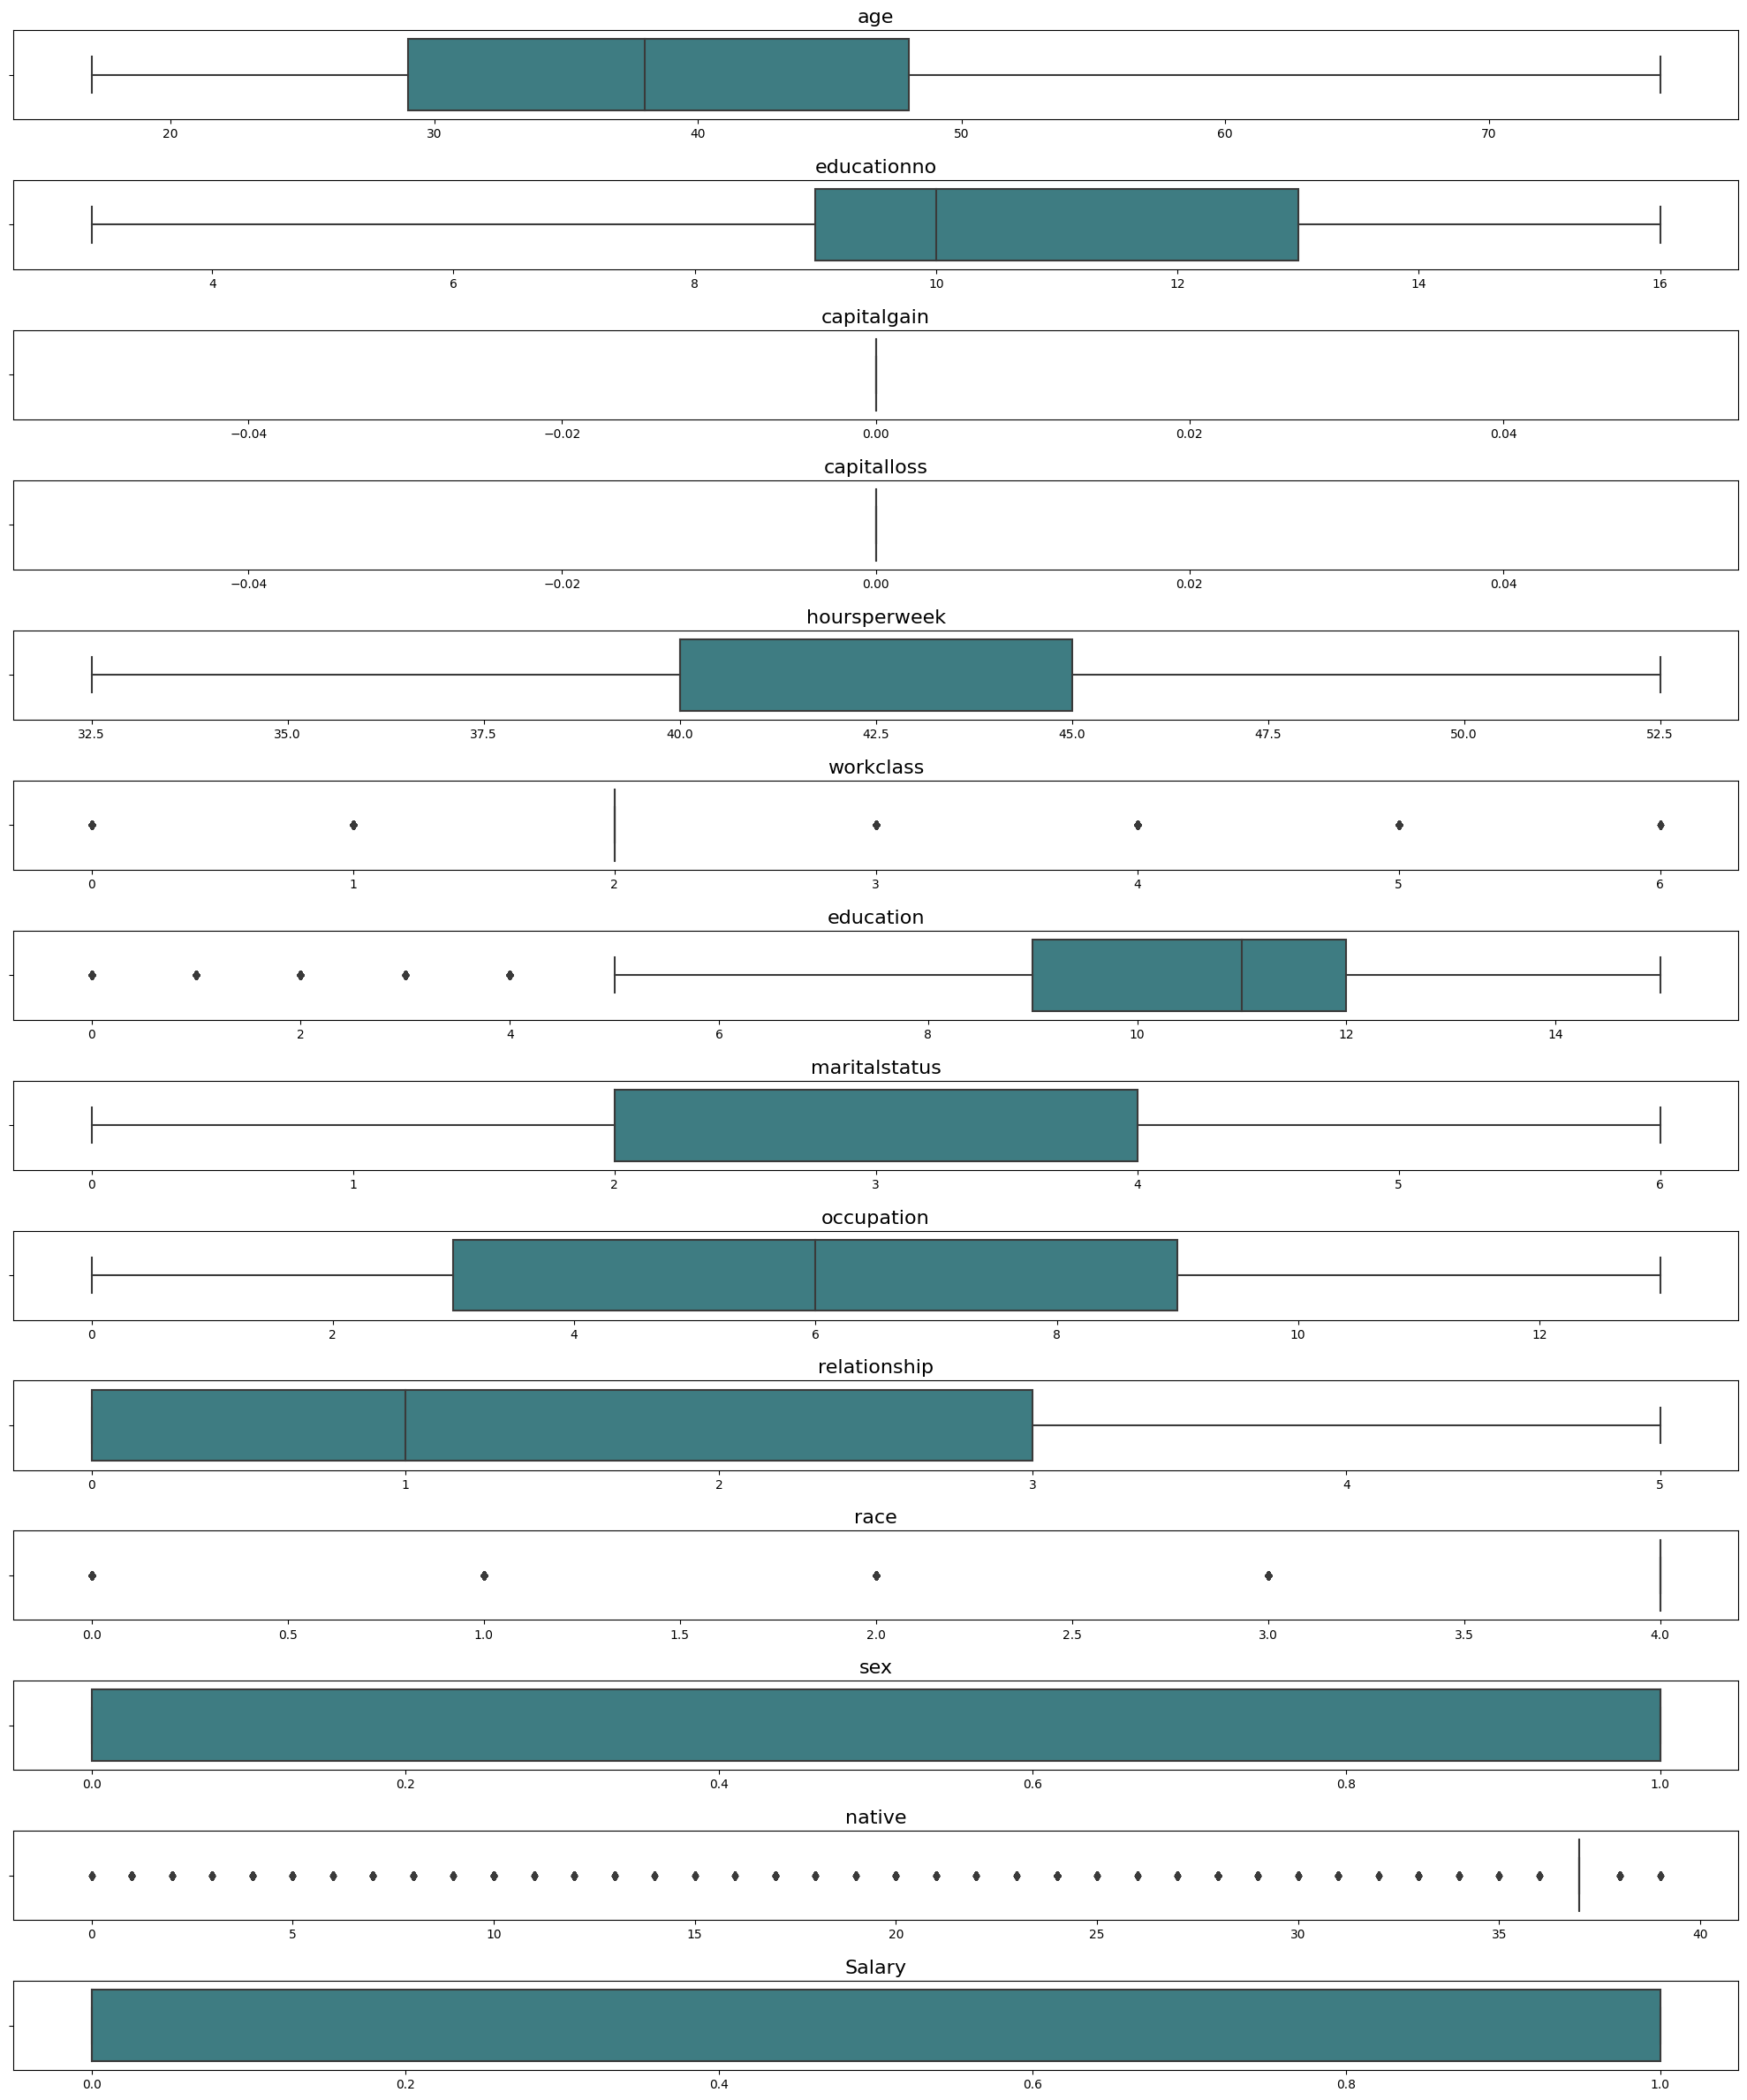

In [21]:
# display boxplots of Treated outliers with IQR

# Display boxplots
# Create subplots
fig, axes = plt.subplots(len(new_data.columns), 1, figsize=(20, 24), sharex=False, sharey=False)

# Loop through each variable and create boxplots
for i, variable in enumerate(new_data):
    sns.boxplot(x=variable, data=new_data, palette='crest', ax=axes[i])
    axes[i].set_title(f'{variable}', fontsize=16) 
    axes[i].set_xlabel('')  

plt.tight_layout(pad=1.5)
plt.show()


## distribution plots

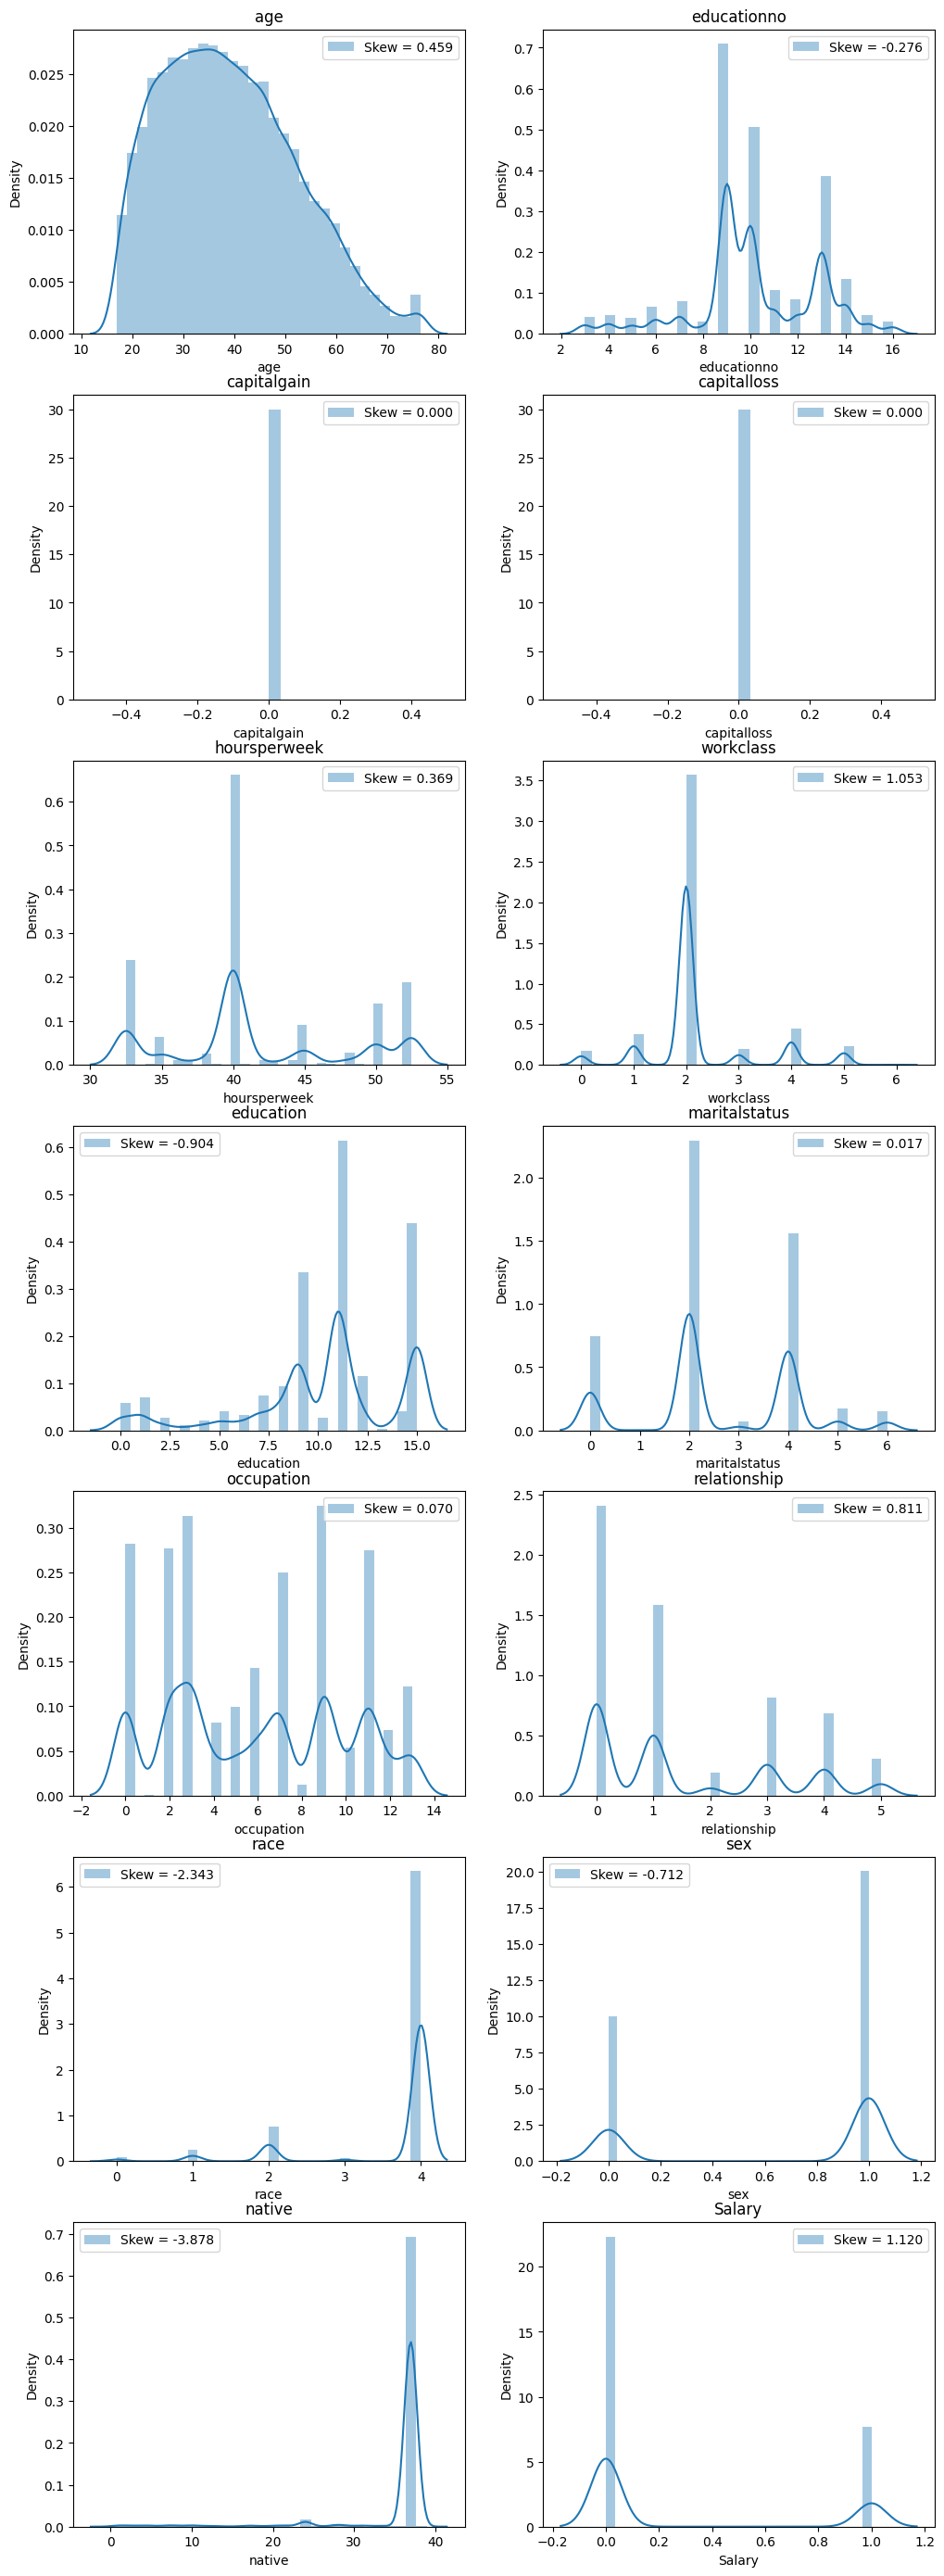

In [22]:
# distribution plots
subplots_per_row = 2
num_rows = (len(new_data.columns) + subplots_per_row - 1) // subplots_per_row
fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(12, 5*num_rows))
axes = axes.flatten()

for i, column in enumerate(new_data.columns):
    ax = axes[i]
    skew = new_data[column].skew()
    sns.distplot(new_data[column], kde= True, label='Skew = %.3f' %(skew), bins=30, ax=ax)
    ax.legend(loc='best')
    ax.set_title(column)
    
# Hide any remaining empty subplots
for i in range(len(new_data.columns), num_rows * subplots_per_row):
    fig.delaxes(axes[i])

# plt.tight_layout()
plt.show()


## Histogram & Probability Plot (Q-Q plot)

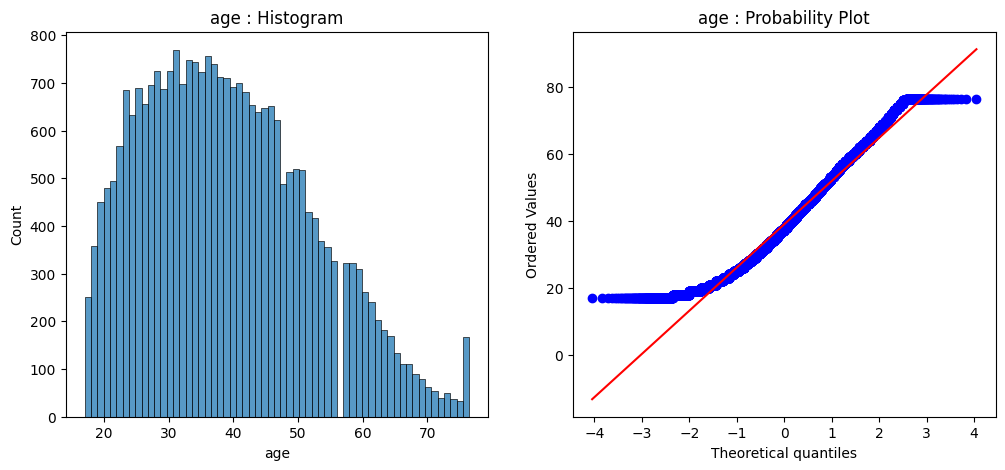

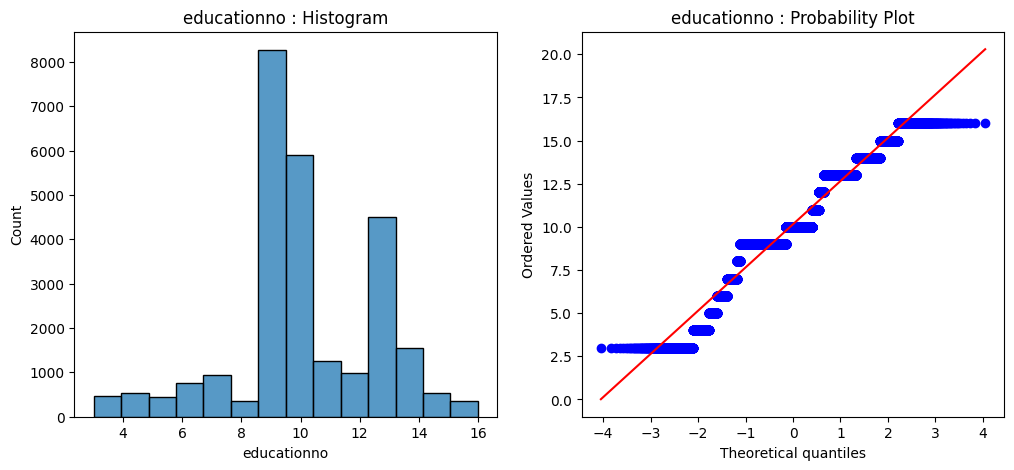

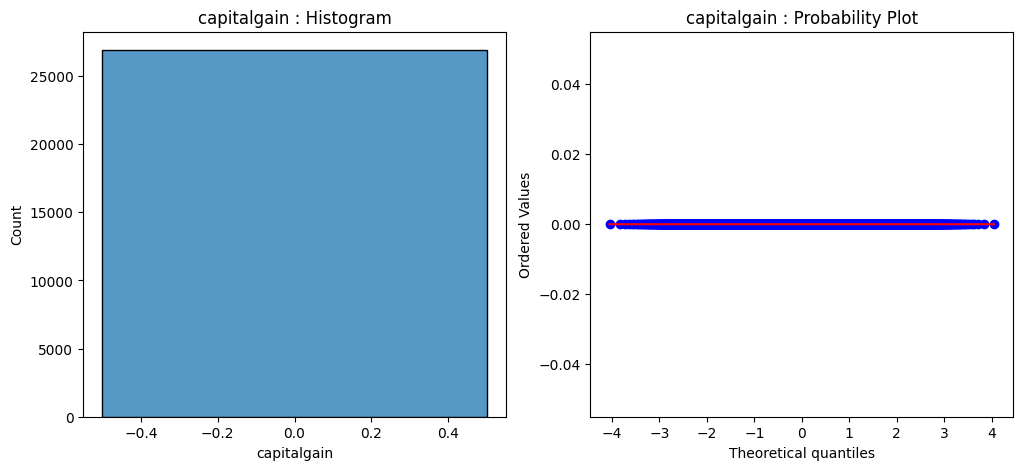

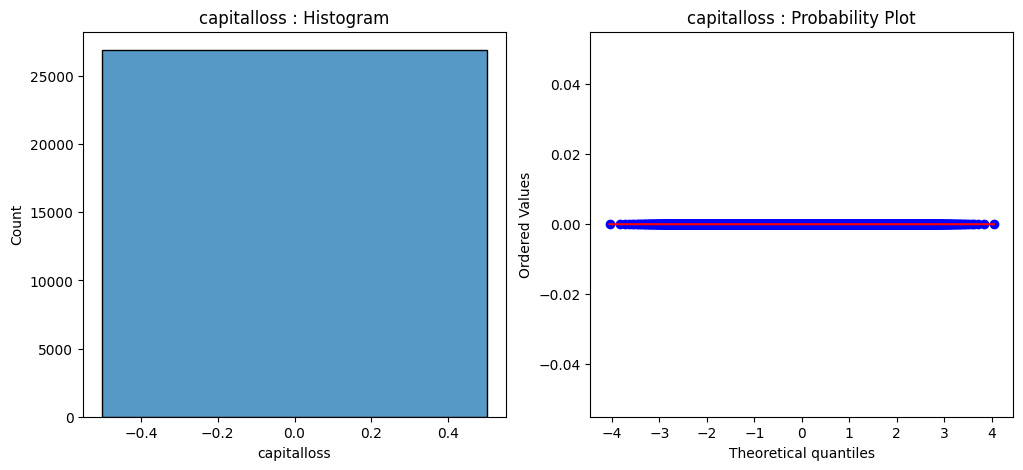

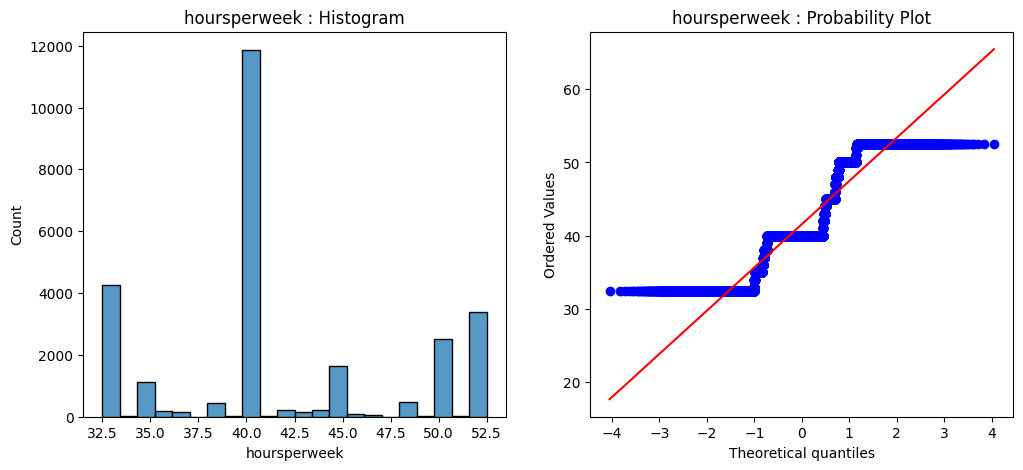

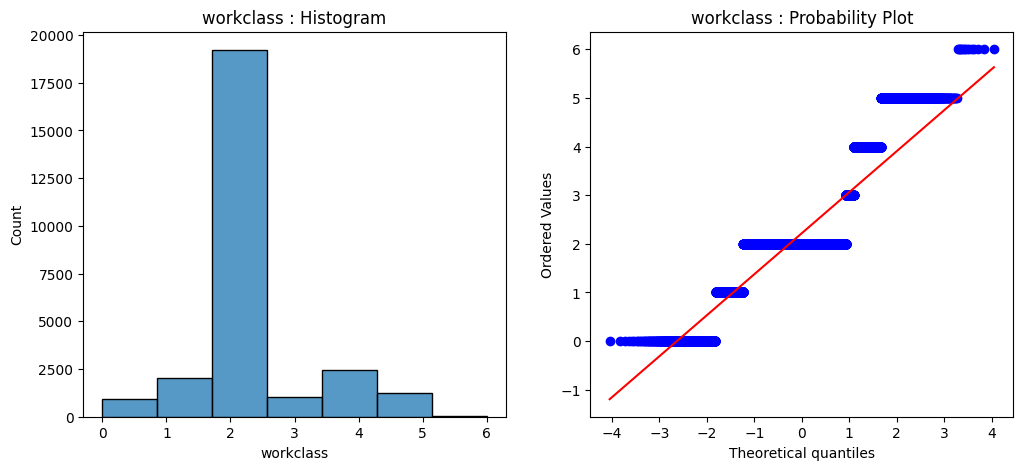

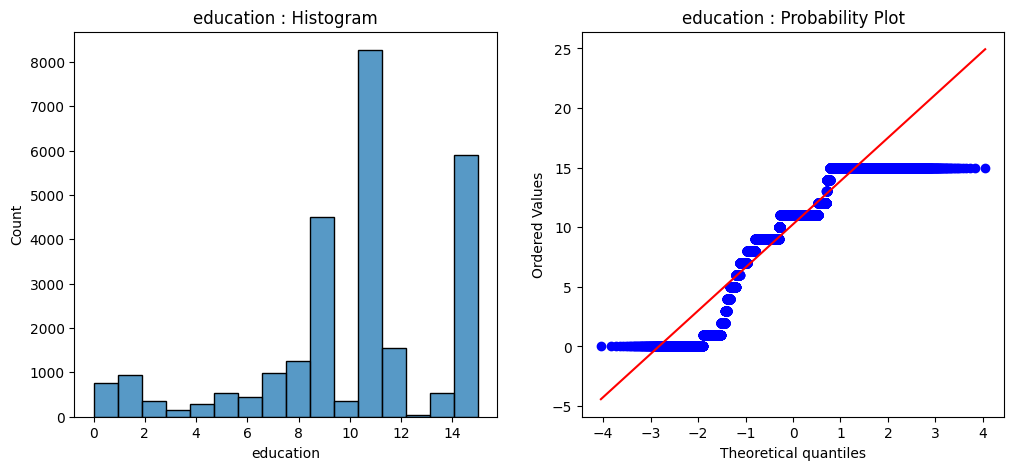

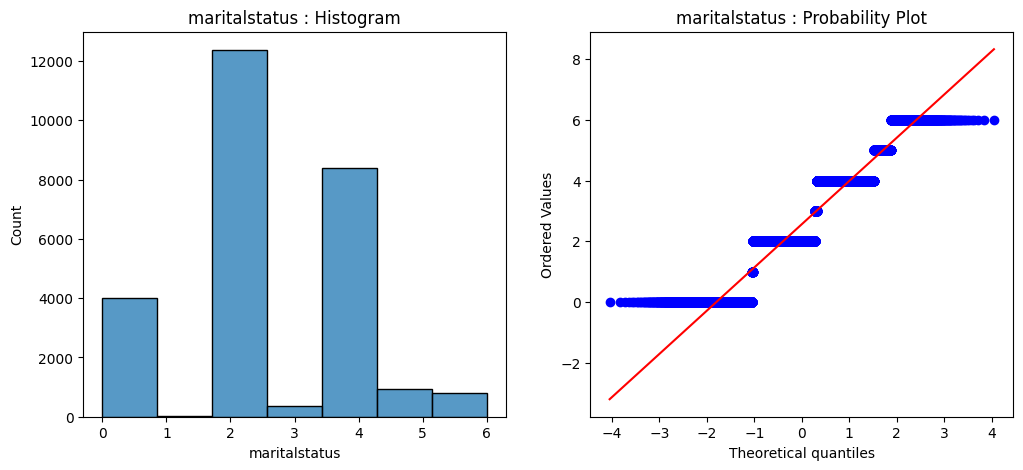

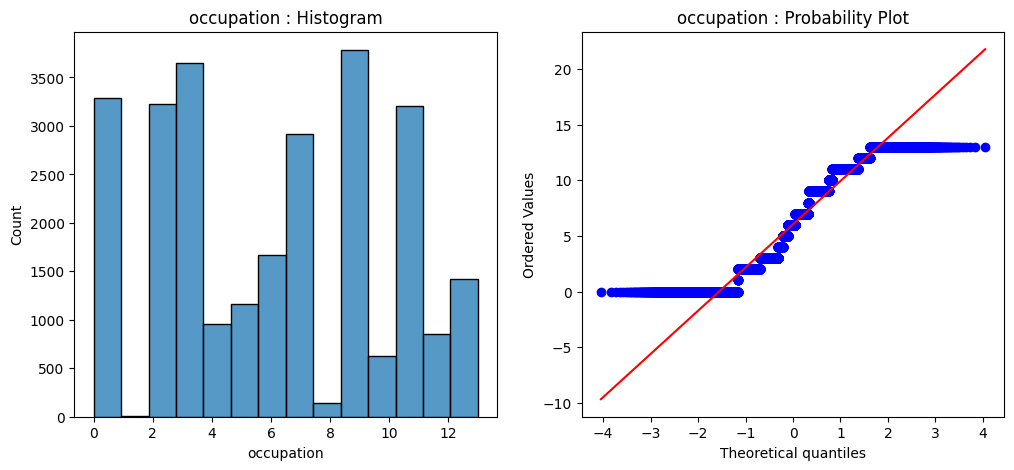

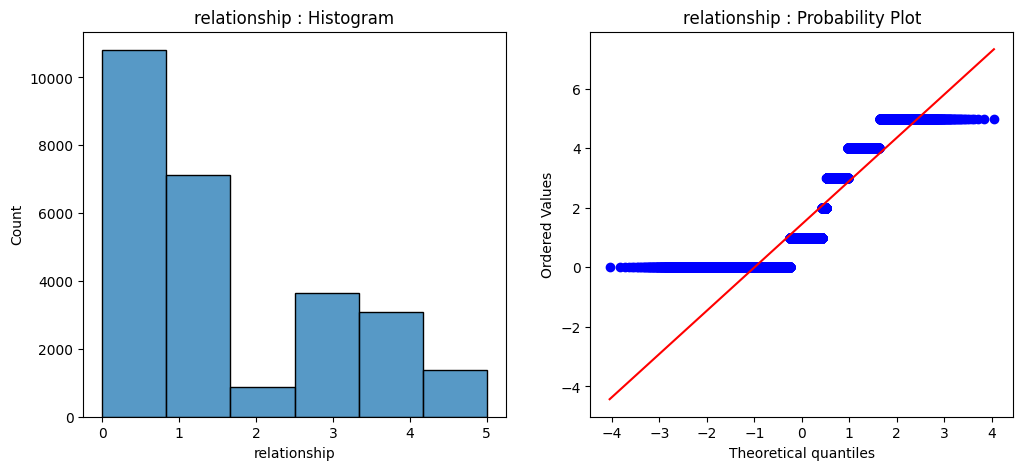

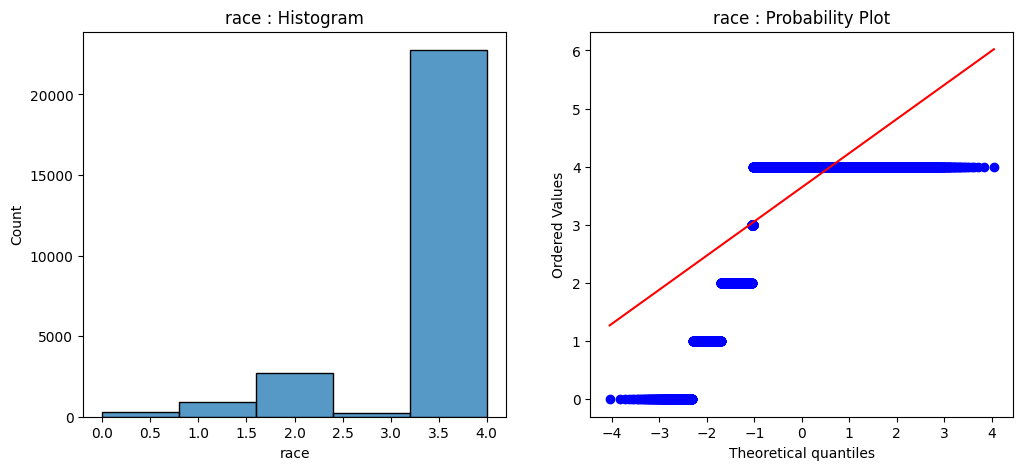

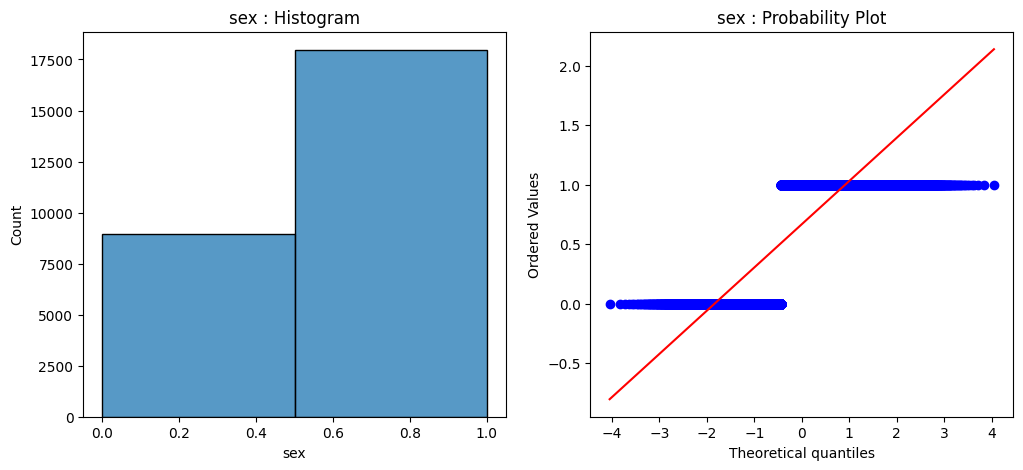

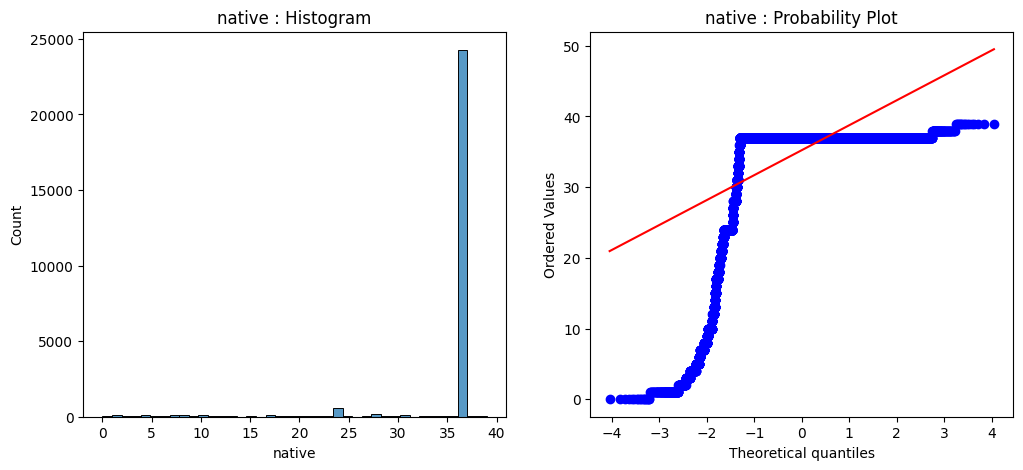

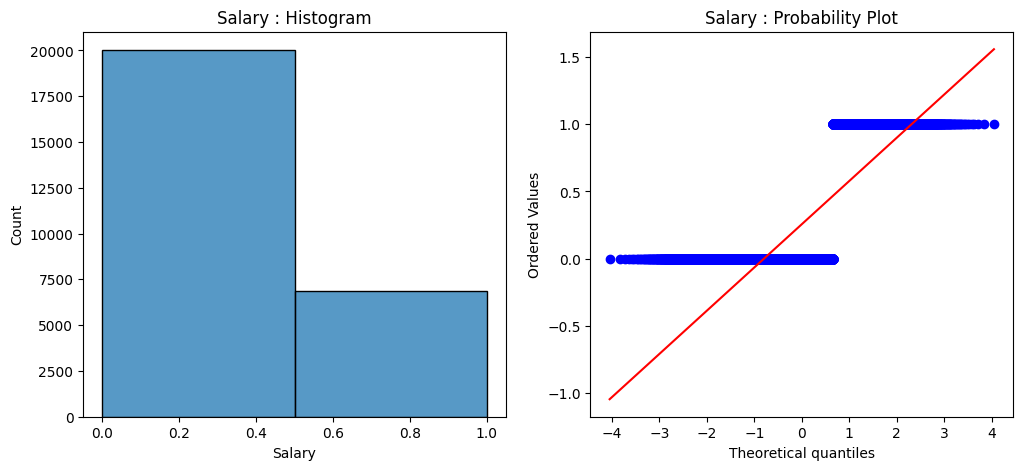

In [23]:
# Histogram & Probability Plot (Q-Q plot)
import pylab
import scipy.stats as stat

def plot_data(df, feature):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], bins=len(df[feature].value_counts()))
    # df[feature].hist()
    plt.title(f'{feature} : Histogram')
    plt.subplot(1, 2, 2)
    stat.probplot(df[feature], dist='norm', plot=pylab)
    plt.title(f'{feature} : Probability Plot')

# Iterate through all columns
for column in new_data.columns:
    plot_data(new_data, column)
    plt.show()


# Model Building  & Testing

In [24]:
X_train = new_data.iloc[:,0:13]    # new_data
y_train = new_data.iloc[:,13]
X_test = data_test_Final.iloc[:,0:13]
y_test = data_test_Final.iloc[:,13]
print(y_train)
X_train
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

0        0
1        0
2        0
3        0
4        0
        ..
30154    1
30155    0
30156    0
30158    0
30160    1
Name: Salary, Length: 26903, dtype: int32


age  educationno  capitalgain  capitalloss  hoursperweek  workclass  \
0      39.0           13            0            0          40.0          5   
1      50.0           13            0            0          32.5          4   
2      38.0            9            0            0          40.0          2   
3      53.0            7            0            0          40.0          2   
4      28.0           13            0            0          40.0          2   
...     ...          ...          ...          ...           ...        ...   
30154  53.0           14            0            0          40.0          2   
30155  22.0           10            0            0          40.0          2   
30156  27.0           12            0            0          38.0          2   
30158  58.0            9            0            0          40.0          2   
30160  52.0            9            0            0          40.0          3   

       education  maritalstatus  occupation  relationship  race  sex  native  
0              9              4           0             1     4    1      37  
1              9              2           3             0     4    1      37  
2             11              0           5             1     4    1      37  
3              1              2           5             0     2    1      37  
4              9              2           9             5     2    0       4  
...          ...            ...         ...           ...   ...  ...     ...  
30154         12              2           3             0     4    1      37  
30155         15              4          10             1     4    1      37  
30156          7              2          12             5     4    0      37  
30158         11              6           0             4     4    0      37  
30160         11              2           3             5     4    0      37  

[26903 rows x 13 columns]

In [25]:
# # StandardScaler
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)
# y_train =np.array(y_train)      # y_train = sc.fit_transform(y_train)
# y_test =np.array(y_test)      # y_test = sc.transform(y_test)
# pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train,columns=['Salary'])], axis=1)

# SVM model building

In [26]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

clf = SVC()
param_grid = [{'kernel':['linear', 'rbf'], 'gamma':[0.5,0.1,0.01], 'C':[10,0.1,0.001,0.0001]}]
# param_grid = [{'kernel': ['linear'], 'C': [10, 0.1, 0.001, 0.0001]}]
gsv = RandomizedSearchCV(clf, param_grid,cv = 5, verbose=300, n_jobs=-1)
gsv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions=[{'C': [10, 0.1, 0.001, 0.0001],
                                         'gamma': [0.5, 0.1, 0.01],
                                         'kernel': ['linear', 'rbf']}],
                   verbose=300)

In [27]:
gsv.best_score_, gsv.best_params_

(0.7956731761001293, {'kernel': 'linear', 'gamma': 0.01, 'C': 0.1})

In [28]:
y_pred = gsv.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 1])

In [29]:
# Evaluate the accuracy of the model
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
# acc = np.mean(y_pred==y_test)
# acc

Accuracy: 0.792002830856334


Confusion Matrix:

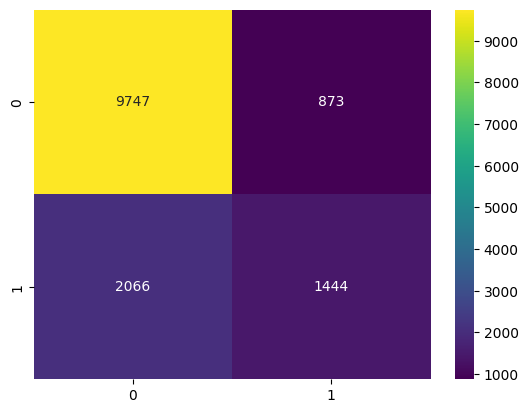

In [30]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

compare the actual with the predicted:

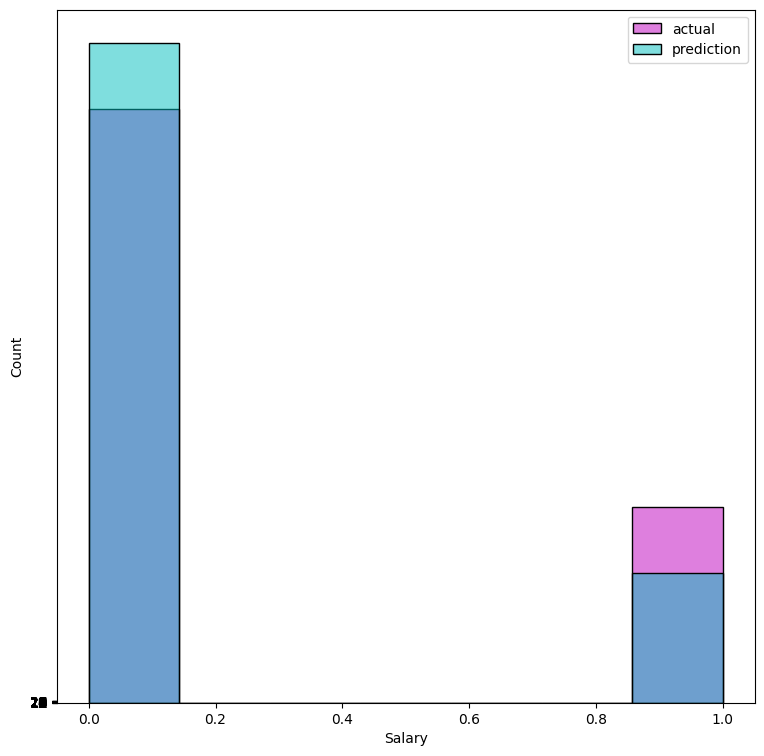

In [31]:
plt.rcParams['figure.figsize'] = (9, 9)

fig, ax = plt.subplots()

sns.histplot(y_test, color='m', alpha=0.5, label='actual', bins=7, ax=ax)
sns.histplot(y_pred, color='c', alpha=0.5, label='prediction', bins=7, ax=ax)

ax.yaxis.set_ticks(range(0, 30))
ax.legend(loc='best')

plt.show()


Precision, Recall, and F1-Score:

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

Precision: 0.7749573472171092, Recall: 0.792002830856334, F1-Score: 0.7762412225214911


Receiver Operating Characteristic (ROC) Curve: Binary Classification problem

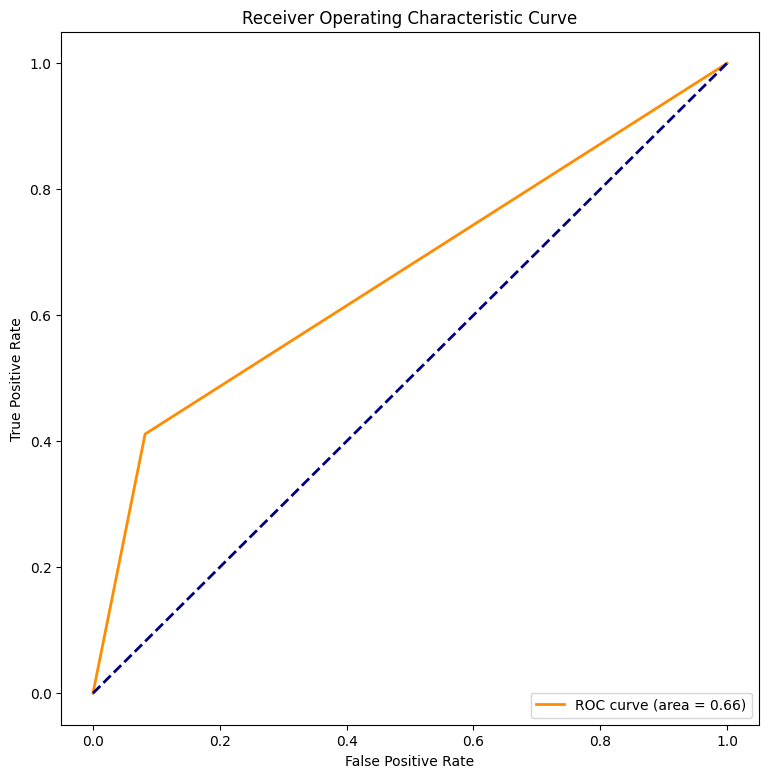

In [33]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()

Cross-Validation:

In [34]:
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(y_pred, X_train, y_train, cv=5)  # 5-fold cross-validation
# print("Cross-Validation Scores:", scores)
# print("Mean Accuracy:", scores.mean())

## Using linear kernel

In [35]:
clf1 = SVC(kernel = 'linear')
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
acc = accuracy_score(y_pred, y_test)
acc

0.792002830856334

In [36]:
clf1 = SVC(kernel = 'linear', C = 10, gamma = 0.5)
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
acc = accuracy_score(y_pred, y_test)
acc

0.792002830856334

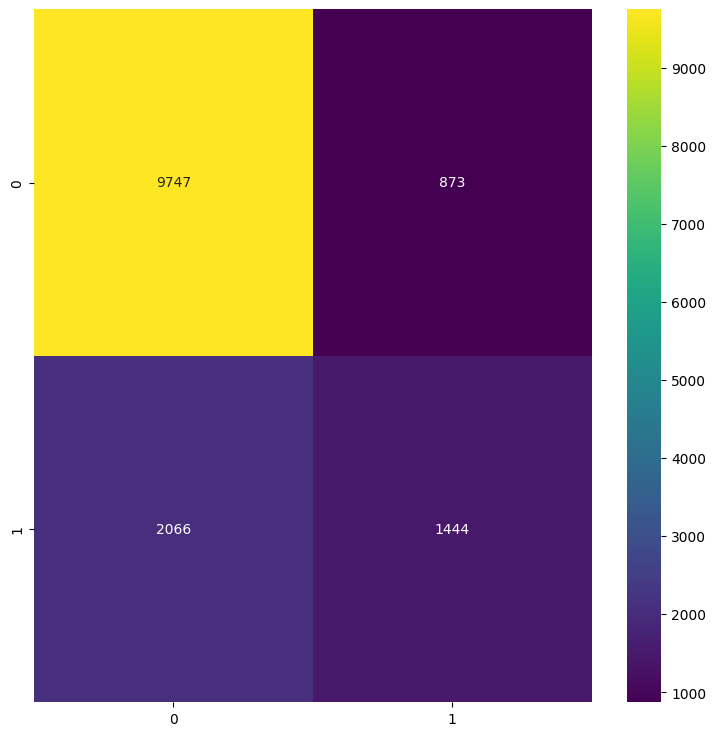

In [37]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

compare the actual with the predicted:

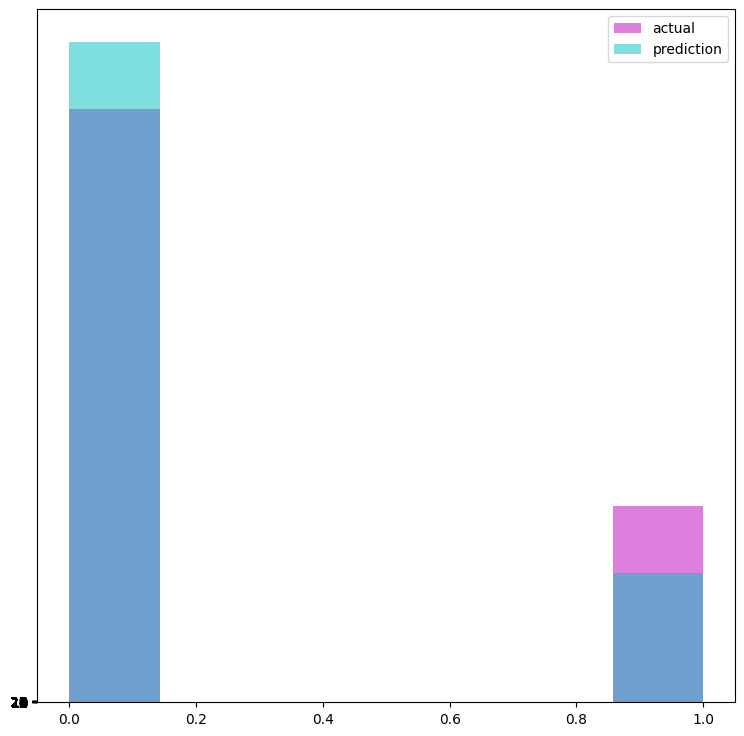

In [38]:
plt.rcParams['figure.figsize'] = (9,9) 
fig, ax = plt.subplots()
ax.hist(y_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(y_pred, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,30))
ax.legend(loc = 'best')
plt.show()

Receiver Operating Characteristic (ROC) Curve: Binary Classification problem

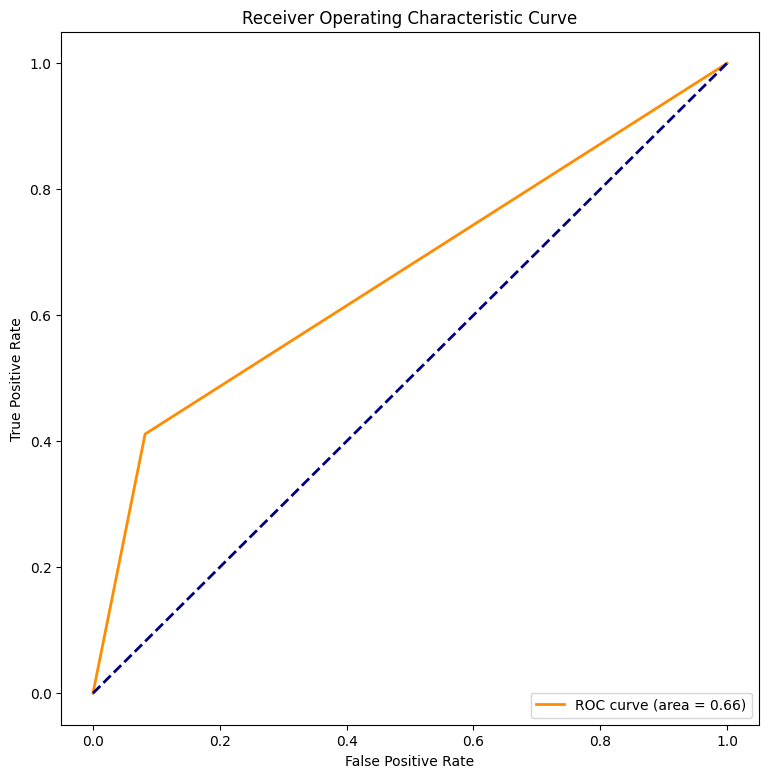

In [39]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()


## Using ploy kernel

In [40]:
clf2 = SVC(kernel='poly')
clf2.fit(X_train,y_train)
y_pred = clf2.predict(X_test)
acc = accuracy_score(y_test,y_pred)*100
print('Accuracy=',acc)


Accuracy= 79.80891719745223


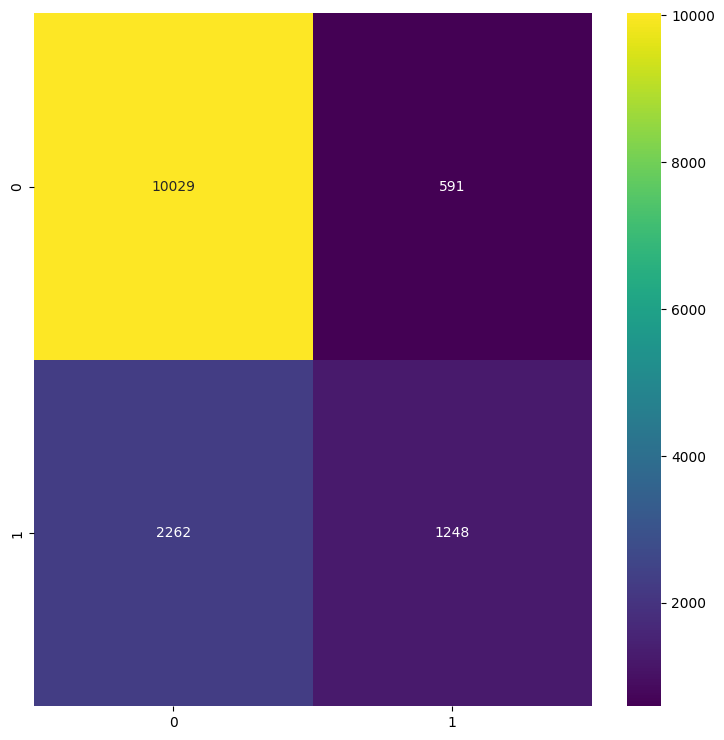

In [41]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

compare the actual with the predicted:

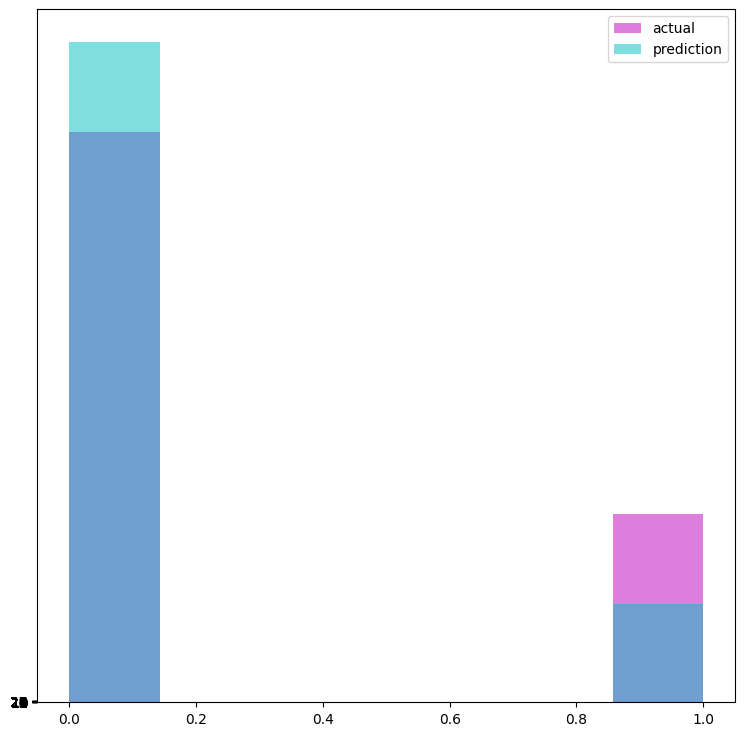

In [42]:
plt.rcParams['figure.figsize'] = (9,9) 
fig, ax = plt.subplots()
ax.hist(y_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(y_pred, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,30))
ax.legend(loc = 'best')
plt.show()

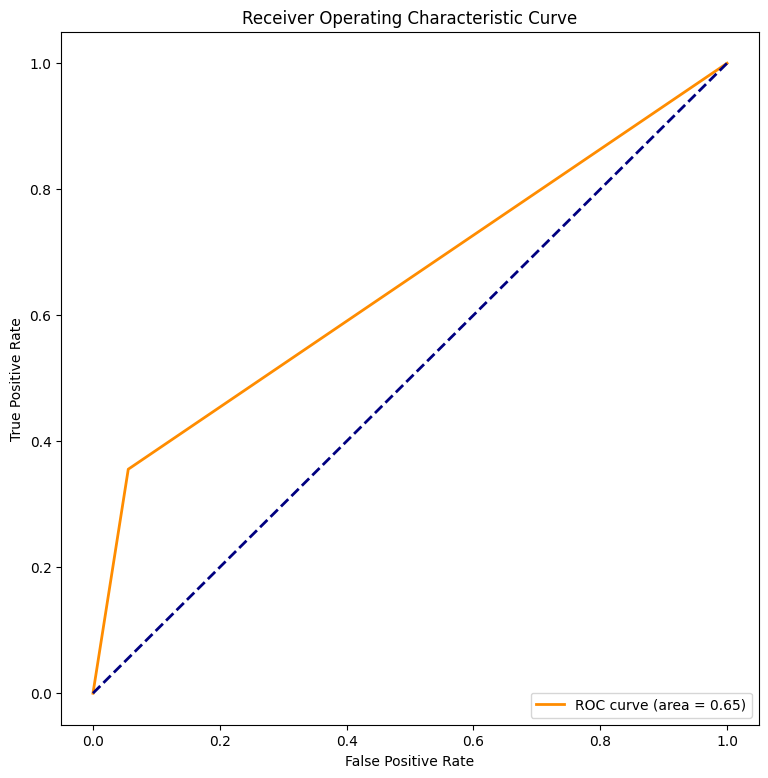

In [43]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()
